I work as a marketing analyst for an e-commerce company and have noticed a recent decline in conversions, which refers to the ratio of customers who made purchases to the total number of website visitors. I am interested in investigating the reasons behind this decline and want to create a predictive model that can identify customers with a higher likelihood of converting. Your goal is to use this model to target specific users with special offers throughout the week.

To achieve this, I've collected a dataset containing customer activities over the past five days (Monday to Friday) and whether each customer converted or not on the fifth day (Friday). Additionally, I have demographic information available. The dataset includes various columns that encompass this information:

# The Main Question

what are the characteristics of users who convert (behavioural and demographic)?
In addition, complete the following:

1. Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.
2. Prepare your data for modelling (i.e., data cleaning and feature engineering).
3. Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem
4. Evaluate each model using the evaluation techniques you have learned in class.
5. Select and optimize your final model.
6. Explain your model to a business executive. Your explanation should include the following:
    1. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
    2. Your approach for building and evaluating the model. 
    3. The final model you selected and how you know this is the best model for the problem.
    4. How the model should be used by the business, in business process.


# Dictionary
## Column Description

* 'visitor_id': visitor identifier
* 'visitor_location': where the visitor lives,
* 'marketing_channel': the marketing channel the visitor came from (Organic = they found the website by * themselves, other options are Facebook, Google, Youtube and Instagram),
* 'gender': M for Male or F for Female,
* 'product_views_Mon': the number of products the visitor viewed on Monday,
* 'product_views_Tue': the number of products the visitor viewed on Tuesday,
* 'product_views_Wed': the number of products the visitor viewed on Wednesday,
* 'product_views_Thu': the number of products the visitor viewed on Thursday,
* 'product_views_Fri': the number of products the visitor viewed on Friday,
* 'avg_rating_Mon': the average rating of products viewed on Monday
* 'avg_rating_Tue':the average rating of products viewed on Tuesday,
* 'avg_rating_Wed': the average rating of products viewed on Wednesday,
* 'avg_rating_Thu': the average rating of products viewed on Thursday,
* 'avg_rating_Fri': the average rating of products viewed on Friday,
* 'avg_price_Mon': the average price of products viewed on Monday,
* 'avg_price_Tue': the average price of products viewed on Tuesday
* 'avg_price_Wed': the average price of products viewed on Wednesday
* 'avg_price_Thu': the average price of products viewed on Thursday
* 'avg_price_Fri': the average price of products viewed on Friday
* 'time_on_site_Mon': the total time in minutes spent on the website on Monday
* 'time_on_site_Tue': the total time in minutes spent on the website on Tuesday
* 'time_on_site_Wed': the total time in minutes spent on the website on Wednesday
* 'time_on_site_Thu': the total time in minutes spent on the website on Thursday
* 'time_on_site_Fri': the total time in minutes spent on the website on Friday
* 'pages_visited_Mon': the total number of pages visited on the website on Monday
* 'pages_visited_Tue':the total time in minutes spent on the website on Tuesday
* 'pages_visited_Wed': the total time in minutes spent on the website on Wednesday
* 'pages_visited_Thu': the total time in minutes spent on the website on Thursday
* 'pages_visited_Fri':the total time in minutes spent on the website on Friday
* 'converted_Fri': whether the customer converted on Friday (1 = converted, 0 = not converted)

In [100]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import feature engineering libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import Dataset

In [59]:
conversion_data = pd.read_csv('https://raw.githubusercontent.com/Lily-QianWang/schulich_data_science/main/conversion_data.csv')

In [44]:
conversion_data

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


Since visitor_id and Unnamed:0 are unique characteristic, it will not help us in further prediction. Therefore, we decide to drop these columns.

In [66]:
conversion_data.drop(['Unnamed: 0','visitor_id'], axis=1, inplace=True)

In [8]:
conversion_data.head()

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,33,23,46,57,4,5,5,4,6,1
1,South America,organic,F,2,5,0,1,5,1.31,2.16,...,28,39,24,51,5,6,7,6,2,0
2,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,34,22,34,31,1,3,3,2,3,1
3,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,26,43,22,39,3,4,7,7,1,0
4,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,54,30,47,57,6,6,5,2,4,1


# Data Wrangling

## Check the basic information about the dataset

In [9]:
conversion_data.shape

(2000, 29)

In [10]:
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   2000 non-null   object 
 1   marketing_channel  2000 non-null   object 
 2   gender             2000 non-null   object 
 3   product_views_Mon  2000 non-null   int64  
 4   product_views_Tue  2000 non-null   int64  
 5   product_views_Wed  2000 non-null   int64  
 6   product_views_Thu  2000 non-null   int64  
 7   product_views_Fri  2000 non-null   int64  
 8   avg_rating_Mon     2000 non-null   float64
 9   avg_rating_Tue     2000 non-null   float64
 10  avg_rating_Wed     2000 non-null   float64
 11  avg_rating_Thu     2000 non-null   float64
 12  avg_rating_Fri     2000 non-null   float64
 13  avg_price_Mon      2000 non-null   float64
 14  avg_price_Tue      2000 non-null   float64
 15  avg_price_Wed      2000 non-null   float64
 16  avg_price_Thu      2000 

In [11]:
conversion_data.dtypes

visitor_location      object
marketing_channel     object
gender                object
product_views_Mon      int64
product_views_Tue      int64
product_views_Wed      int64
product_views_Thu      int64
product_views_Fri      int64
avg_rating_Mon       float64
avg_rating_Tue       float64
avg_rating_Wed       float64
avg_rating_Thu       float64
avg_rating_Fri       float64
avg_price_Mon        float64
avg_price_Tue        float64
avg_price_Wed        float64
avg_price_Thu        float64
avg_price_Fri        float64
time_on_site_Mon       int64
time_on_site_Tue       int64
time_on_site_Wed       int64
time_on_site_Thu       int64
time_on_site_Fri       int64
pages_visited_Mon      int64
pages_visited_Tue      int64
pages_visited_Wed      int64
pages_visited_Thu      int64
pages_visited_Fri      int64
converted_Fri          int64
dtype: object

In [12]:
conversion_data.describe(include='all')

,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,433,431,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


1. Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.

First, we check the rough distributions of the variables.

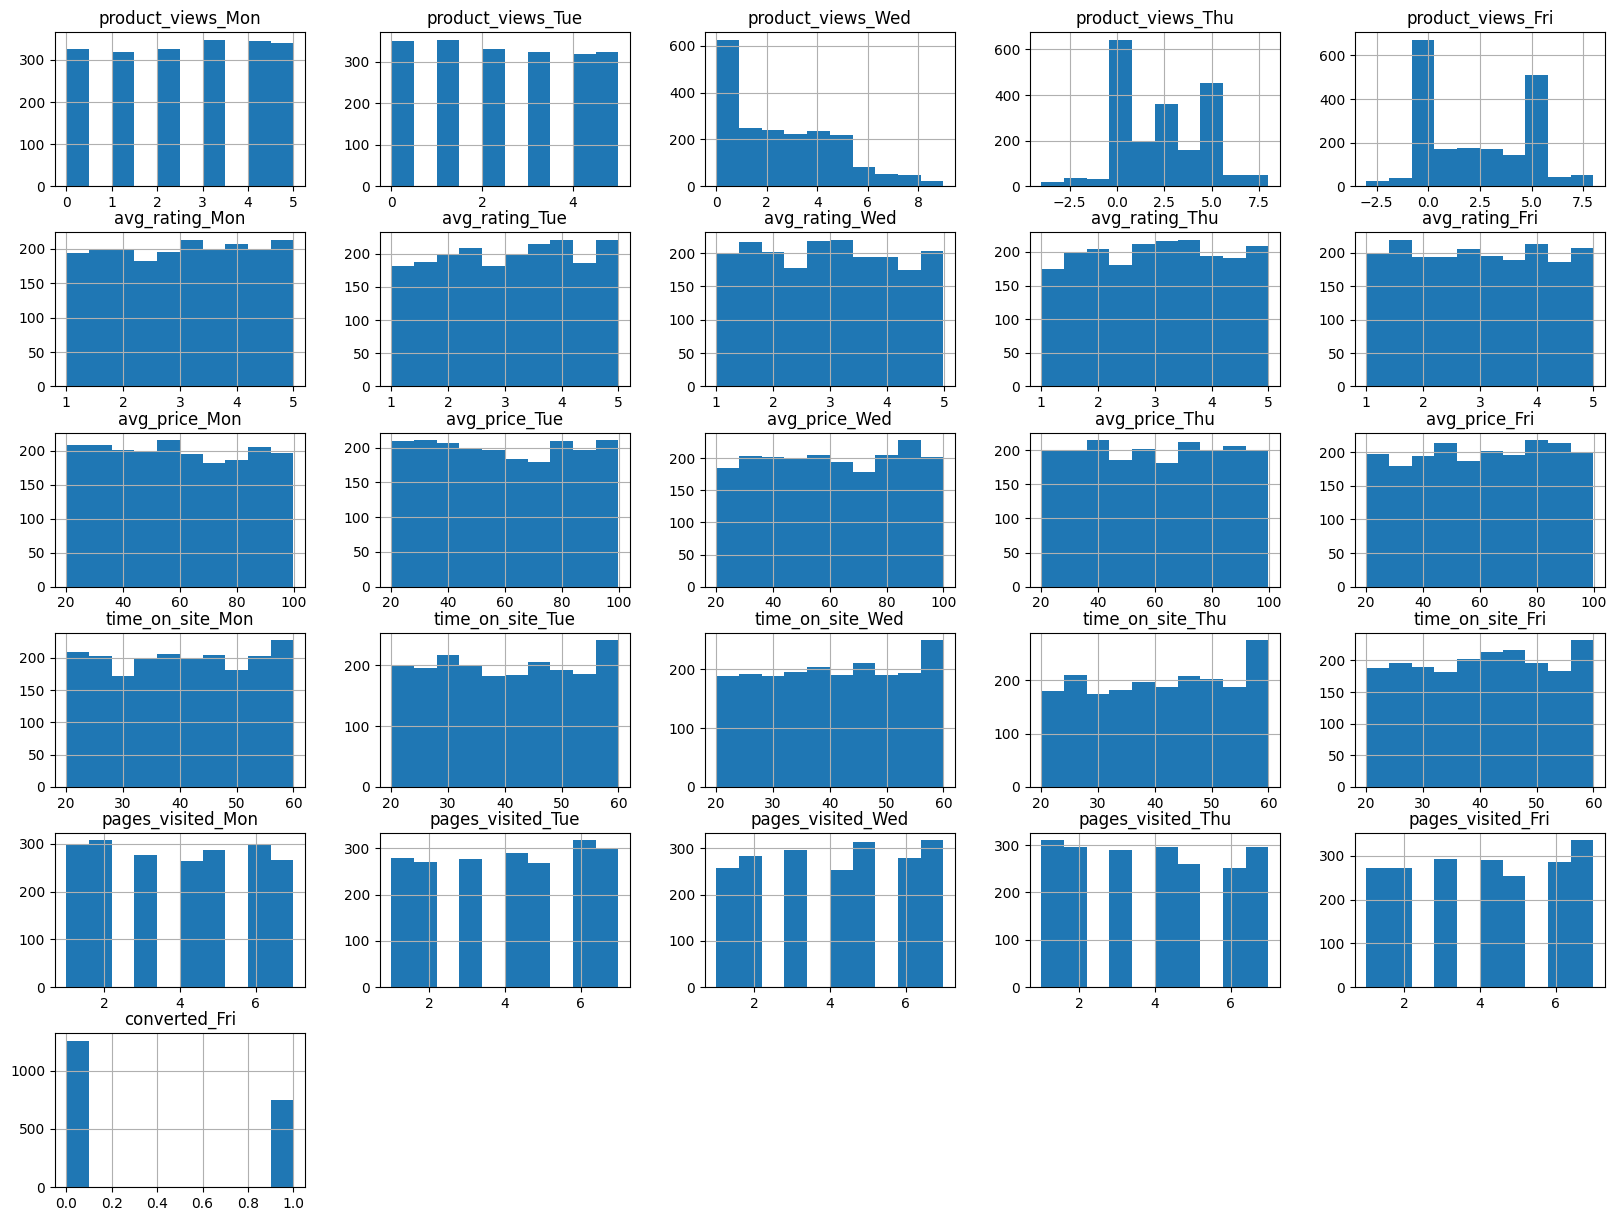

In [13]:
conversion_data.hist(figsize=(20,15))
plt.show()

Then we are going to distinguish the discrete and continuous variables. We compare the unique values in each column with a threshold. If it is greater than the threshold, it means the variable is continuous, otherwise, it is a discrete variable.

In [14]:
cols = conversion_data.columns
cols

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [34]:

print(f"The unique values in `visitor_location`: {conversion_data['visitor_location'].unique()}; Total: {conversion_data['visitor_location'].nunique()}")
print(f"The unique values in `marketing_channel`: {conversion_data['marketing_channel'].unique()}; Total: {conversion_data['marketing_channel'].nunique()}")
print(f"The unique values in `gender`: {conversion_data['gender'].unique()}; Total: {conversion_data['gender'].nunique()}")
print(f"The unique values in `product_views_Mon`: {conversion_data['product_views_Mon'].unique()}; Total: {conversion_data['product_views_Mon'].nunique()}")
print(f"The unique values in `product_views_Tue`: {conversion_data['product_views_Tue'].unique()}; Total: {conversion_data['product_views_Tue'].nunique()}")
print(f"The unique values in `product_views_Wed`: {conversion_data['product_views_Wed'].unique()}; Total: {conversion_data['product_views_Wed'].nunique()}")
print(f"The unique values in `product_views_Thu`: {conversion_data['product_views_Thu'].unique()}; Total: {conversion_data['product_views_Thu'].nunique()}")
print(f"The unique values in `product_views_Fri`: {conversion_data['product_views_Fri'].unique()}; Total: {conversion_data['product_views_Fri'].nunique()}")


The unique values in `visitor_location`: ['North America' 'South America' 'Australia' 'Asia' 'Europe']; Total: 5
The unique values in `marketing_channel`: ['youtube' 'organic' 'instagram' 'facebook' 'google']; Total: 5
The unique values in `gender`: ['M' 'F']; Total: 2
The unique values in `product_views_Mon`: [4 2 3 1 0 5]; Total: 6
The unique values in `product_views_Tue`: [5 4 0 2 1 3]; Total: 6
The unique values in `product_views_Wed`: [2 0 1 6 4 5 3 7 8 9]; Total: 10
The unique values in `product_views_Thu`: [ 1 -3  5  2  0  3  4 -2  6  8  7 -4 -1]; Total: 13
The unique values in `product_views_Fri`: [ 2  5  0  3  6  4  1 -3 -1 -2  7  8]; Total: 12


In [35]:


print(f"The unique values in `avg_rating_Mon`: {conversion_data['avg_rating_Mon'].unique()}; Total: {conversion_data['avg_rating_Mon'].nunique()}")
print(f"The unique values in `avg_rating_Tue`: {conversion_data['avg_rating_Tue'].unique()}; Total: {conversion_data['avg_rating_Tue'].nunique()}")
print(f"The unique values in `avg_rating_Wed`: {conversion_data['avg_rating_Wed'].unique()}; Total: {conversion_data['avg_rating_Wed'].nunique()}")
print(f"The unique values in `avg_rating_Thu`: {conversion_data['avg_rating_Thu'].unique()}; Total: {conversion_data['avg_rating_Thu'].nunique()}")
print(f"The unique values in `avg_rating_Fri`: {conversion_data['avg_rating_Fri'].unique()}; Total: {conversion_data['avg_rating_Fri'].nunique()}")
print(f"The unique values in `avg_price_Mon`: {conversion_data['avg_price_Mon'].unique()}; Total: {conversion_data['avg_price_Mon'].nunique()}")
print(f"The unique values in `avg_price_Tue`: {conversion_data['avg_price_Tue'].unique()}; Total: {conversion_data['avg_price_Tue'].nunique()}")
print(f"The unique values in `avg_price_Wed`: {conversion_data['avg_price_Wed'].unique()}; Total: {conversion_data['avg_price_Wed'].nunique()}")


The unique values in `avg_rating_Mon`: [3.9  1.31 3.26 2.66 2.76 2.8  3.32 3.25 2.12 2.1  4.54 3.3  3.27 1.25
 2.02 3.84 1.11 2.33 2.15 4.87 4.15 3.6  1.03 2.94 2.53 4.67 1.28 4.93
 4.42 2.84 1.42 3.91 2.92 1.81 2.13 3.58 1.33 3.76 4.9  3.29 2.43 3.1
 1.24 2.5  1.77 1.46 3.33 3.83 1.69 4.21 3.88 4.5  3.05 1.59 4.29 3.23
 3.13 2.19 2.3  2.01 2.28 1.23 4.77 3.15 2.87 2.96 2.35 3.14 1.1  4.05
 1.88 2.47 4.52 4.06 1.54 4.28 3.59 4.12 2.95 4.33 3.61 3.16 4.26 1.97
 1.96 3.94 4.64 1.4  3.45 3.95 4.41 2.81 3.43 4.78 1.18 4.74 2.29 4.85
 2.37 3.19 2.75 4.36 1.53 3.47 2.27 3.69 2.67 4.32 1.39 2.22 3.39 3.72
 3.37 4.39 4.53 3.7  2.65 2.82 1.15 1.16 1.   3.18 1.06 4.11 3.66 1.19
 3.97 1.34 3.79 2.46 2.26 4.16 2.14 4.17 2.32 1.84 1.29 2.05 3.78 3.28
 1.65 3.09 2.36 3.02 3.21 1.76 2.64 2.39 3.81 5.   3.77 4.57 2.42 4.
 3.24 2.54 4.35 1.02 1.35 4.27 2.48 4.65 3.68 2.25 2.31 2.83 4.8  3.64
 3.35 2.44 1.71 3.82 3.   2.78 1.5  1.45 3.96 4.51 3.48 4.01 1.78 2.69
 1.22 4.72 2.56 3.5  2.68 4.04 4.66 1.21 

In [15]:


print(f"The unique values in `avg_price_Thu`: {conversion_data['avg_price_Thu'].unique()}; Total: {conversion_data['avg_price_Thu'].nunique()}")
print(f"The unique values in `avg_price_Fri`: {conversion_data['avg_price_Fri'].unique()}; Total: {conversion_data['avg_price_Fri'].nunique()}")
print(f"The unique values in `time_on_site_Mon`: {conversion_data['time_on_site_Mon'].unique()}; Total: {conversion_data['time_on_site_Mon'].nunique()}")
print(f"The unique values in `time_on_site_Tue`: {conversion_data['time_on_site_Tue'].unique()}; Total: {conversion_data['time_on_site_Tue'].nunique()}")
print(f"The unique values in `time_on_site_Wed`: {conversion_data['time_on_site_Wed'].unique()}; Total: {conversion_data['time_on_site_Wed'].nunique()}")
print(f"The unique values in `time_on_site_Thu`: {conversion_data['time_on_site_Thu'].unique()}; Total: {conversion_data['time_on_site_Thu'].nunique()}")
print(f"The unique values in `time_on_site_Fri`: {conversion_data['time_on_site_Fri'].unique()}; Total: {conversion_data['time_on_site_Fri'].nunique()}")
print(f"The unique values in `pages_visited_Mon`: {conversion_data['pages_visited_Mon'].unique()}; Total: {conversion_data['pages_visited_Mon'].nunique()}")


The unique values in `avg_price_Thu`: [37.47 81.09 42.59 ... 57.99 58.94 57.6 ]; Total: 1785
The unique values in `avg_price_Fri`: [69.17 43.44 71.65 ... 21.45 81.43 92.99]; Total: 1761
The unique values in `time_on_site_Mon`: [57 24 23 56 35 49 20 45 26 55 22 28 51 29 25 40 43 41 33 31 32 37 50 27
 58 39 21 38 44 30 54 42 48 47 52 46 53 36 60 34 59]; Total: 41
The unique values in `time_on_site_Tue`: [33 28 34 26 54 45 53 39 41 31 25 38 23 20 60 37 46 51 30 47 43 32 27 36
 55 42 49 24 52 57 22 35 48 58 50 21 56 29 44 59 40]; Total: 41
The unique values in `time_on_site_Wed`: [23 39 22 43 30 29 55 42 37 50 36 27 24 54 31 26 45 46 44 25 59 35 49 32
 56 34 60 48 51 47 21 20 41 28 57 33 52 58 53 38 40]; Total: 41
The unique values in `time_on_site_Thu`: [46 24 34 22 47 20 33 39 40 56 52 44 35 58 29 53 49 57 54 37 27 60 25 38
 26 36 51 28 50 59 45 43 55 42 48 31 21 30 32 41 23]; Total: 41
The unique values in `time_on_site_Fri`: [57 51 31 39 56 45 55 36 44 43 48 34 54 41 22 52 42 24 32 53 

In [37]:

print(f"The unique values in `pages_visited_Tue`: {conversion_data['pages_visited_Tue'].unique()}; Total: {conversion_data['pages_visited_Tue'].nunique()}")
print(f"The unique values in `pages_visited_Wed`: {conversion_data['pages_visited_Wed'].unique()}; Total: {conversion_data['pages_visited_Wed'].nunique()}")
print(f"The unique values in `pages_visited_Thu`: {conversion_data['pages_visited_Thu'].unique()}; Total: {conversion_data['pages_visited_Thu'].nunique()}")
print(f"The unique values in `time_on_site_Tue`: {conversion_data['time_on_site_Tue'].unique()}; Total: {conversion_data['time_on_site_Tue'].nunique()}")
print(f"The unique values in `time_on_site_Wed`: {conversion_data['time_on_site_Wed'].unique()}; Total: {conversion_data['time_on_site_Wed'].nunique()}")
print(f"The unique values in `time_on_site_Thu`: {conversion_data['time_on_site_Thu'].unique()}; Total: {conversion_data['time_on_site_Thu'].nunique()}")
print(f"The unique values in `pages_visited_Fri`: {conversion_data['pages_visited_Fri'].unique()}; Total: {conversion_data['pages_visited_Fri'].nunique()}")
print(f"The unique values in `converted_Fri`: {conversion_data['converted_Fri'].unique()}; Total: {conversion_data['converted_Fri'].nunique()}")

The unique values in `pages_visited_Tue`: [5 6 3 4 2 1 7]; Total: 7
The unique values in `pages_visited_Wed`: [5 7 3 4 6 1 2]; Total: 7
The unique values in `pages_visited_Thu`: [4 6 2 7 5 3 1]; Total: 7
The unique values in `time_on_site_Tue`: [33 28 34 26 54 45 53 39 41 31 25 38 23 20 60 37 46 51 30 47 43 32 27 36
 55 42 49 24 52 57 22 35 48 58 50 21 56 29 44 59 40]; Total: 41
The unique values in `time_on_site_Wed`: [23 39 22 43 30 29 55 42 37 50 36 27 24 54 31 26 45 46 44 25 59 35 49 32
 56 34 60 48 51 47 21 20 41 28 57 33 52 58 53 38 40]; Total: 41
The unique values in `time_on_site_Thu`: [46 24 34 22 47 20 33 39 40 56 52 44 35 58 29 53 49 57 54 37 27 60 25 38
 26 36 51 28 50 59 45 43 55 42 48 31 21 30 32 41 23]; Total: 41
The unique values in `pages_visited_Fri`: [6 2 3 1 4 5 7]; Total: 7
The unique values in `converted_Fri`: [1 0]; Total: 2


From the results, we can see that:



*   **Categorical variables:**
  'visitor_location',
  'marketing_channel',
  'gender'
  'converted_Fri'
  
*  **Numerical variables:**
  'product_views_Mon',
  'product_views_Tue',
  'product_views_Wed',
  'product_views_Thu',
  'product_views_Fri',
  'avg_rating_Mon',
  'avg_rating_Tue',
  'avg_rating_Wed', 
  'avg_rating_Thu', 
  'avg_rating_Fri', 
  'avg_price_Mon',
  'avg_price_Tue', 
  'avg_price_Wed', 
  'avg_price_Thu', 
  'avg_price_Fri',
  'time_on_site_Mon',
  'time_on_site_Tue', 
  'time_on_site_Wed',
  'time_on_site_Thu', 
  'time_on_site_Fri',
  'pages_visited_Mon',
  'pages_visited_Tue', 
  'pages_visited_Wed', 
  'pages_visited_Thu',
  'pages_visited_Fri'


In [46]:
cat_cols = ['visitor_location','marketing_channel','gender','converted_Fri']
num_cols = ['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu','product_views_Fri','avg_rating_Mon','avg_rating_Tue','avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon','avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri','time_on_site_Mon','time_on_site_Tue', 'time_on_site_Wed','time_on_site_Thu', 'time_on_site_Fri','pages_visited_Mon','pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu','pages_visited_Fri']

## Visualize the variables

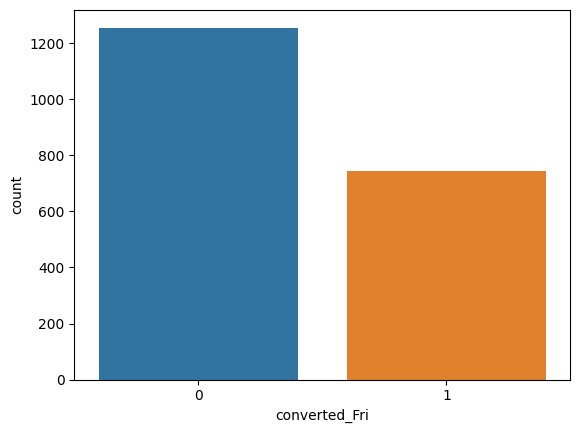

In [17]:
sns.countplot(x='converted_Fri', data=conversion_data)
plt.show()


Check the detaied plot of each variable.

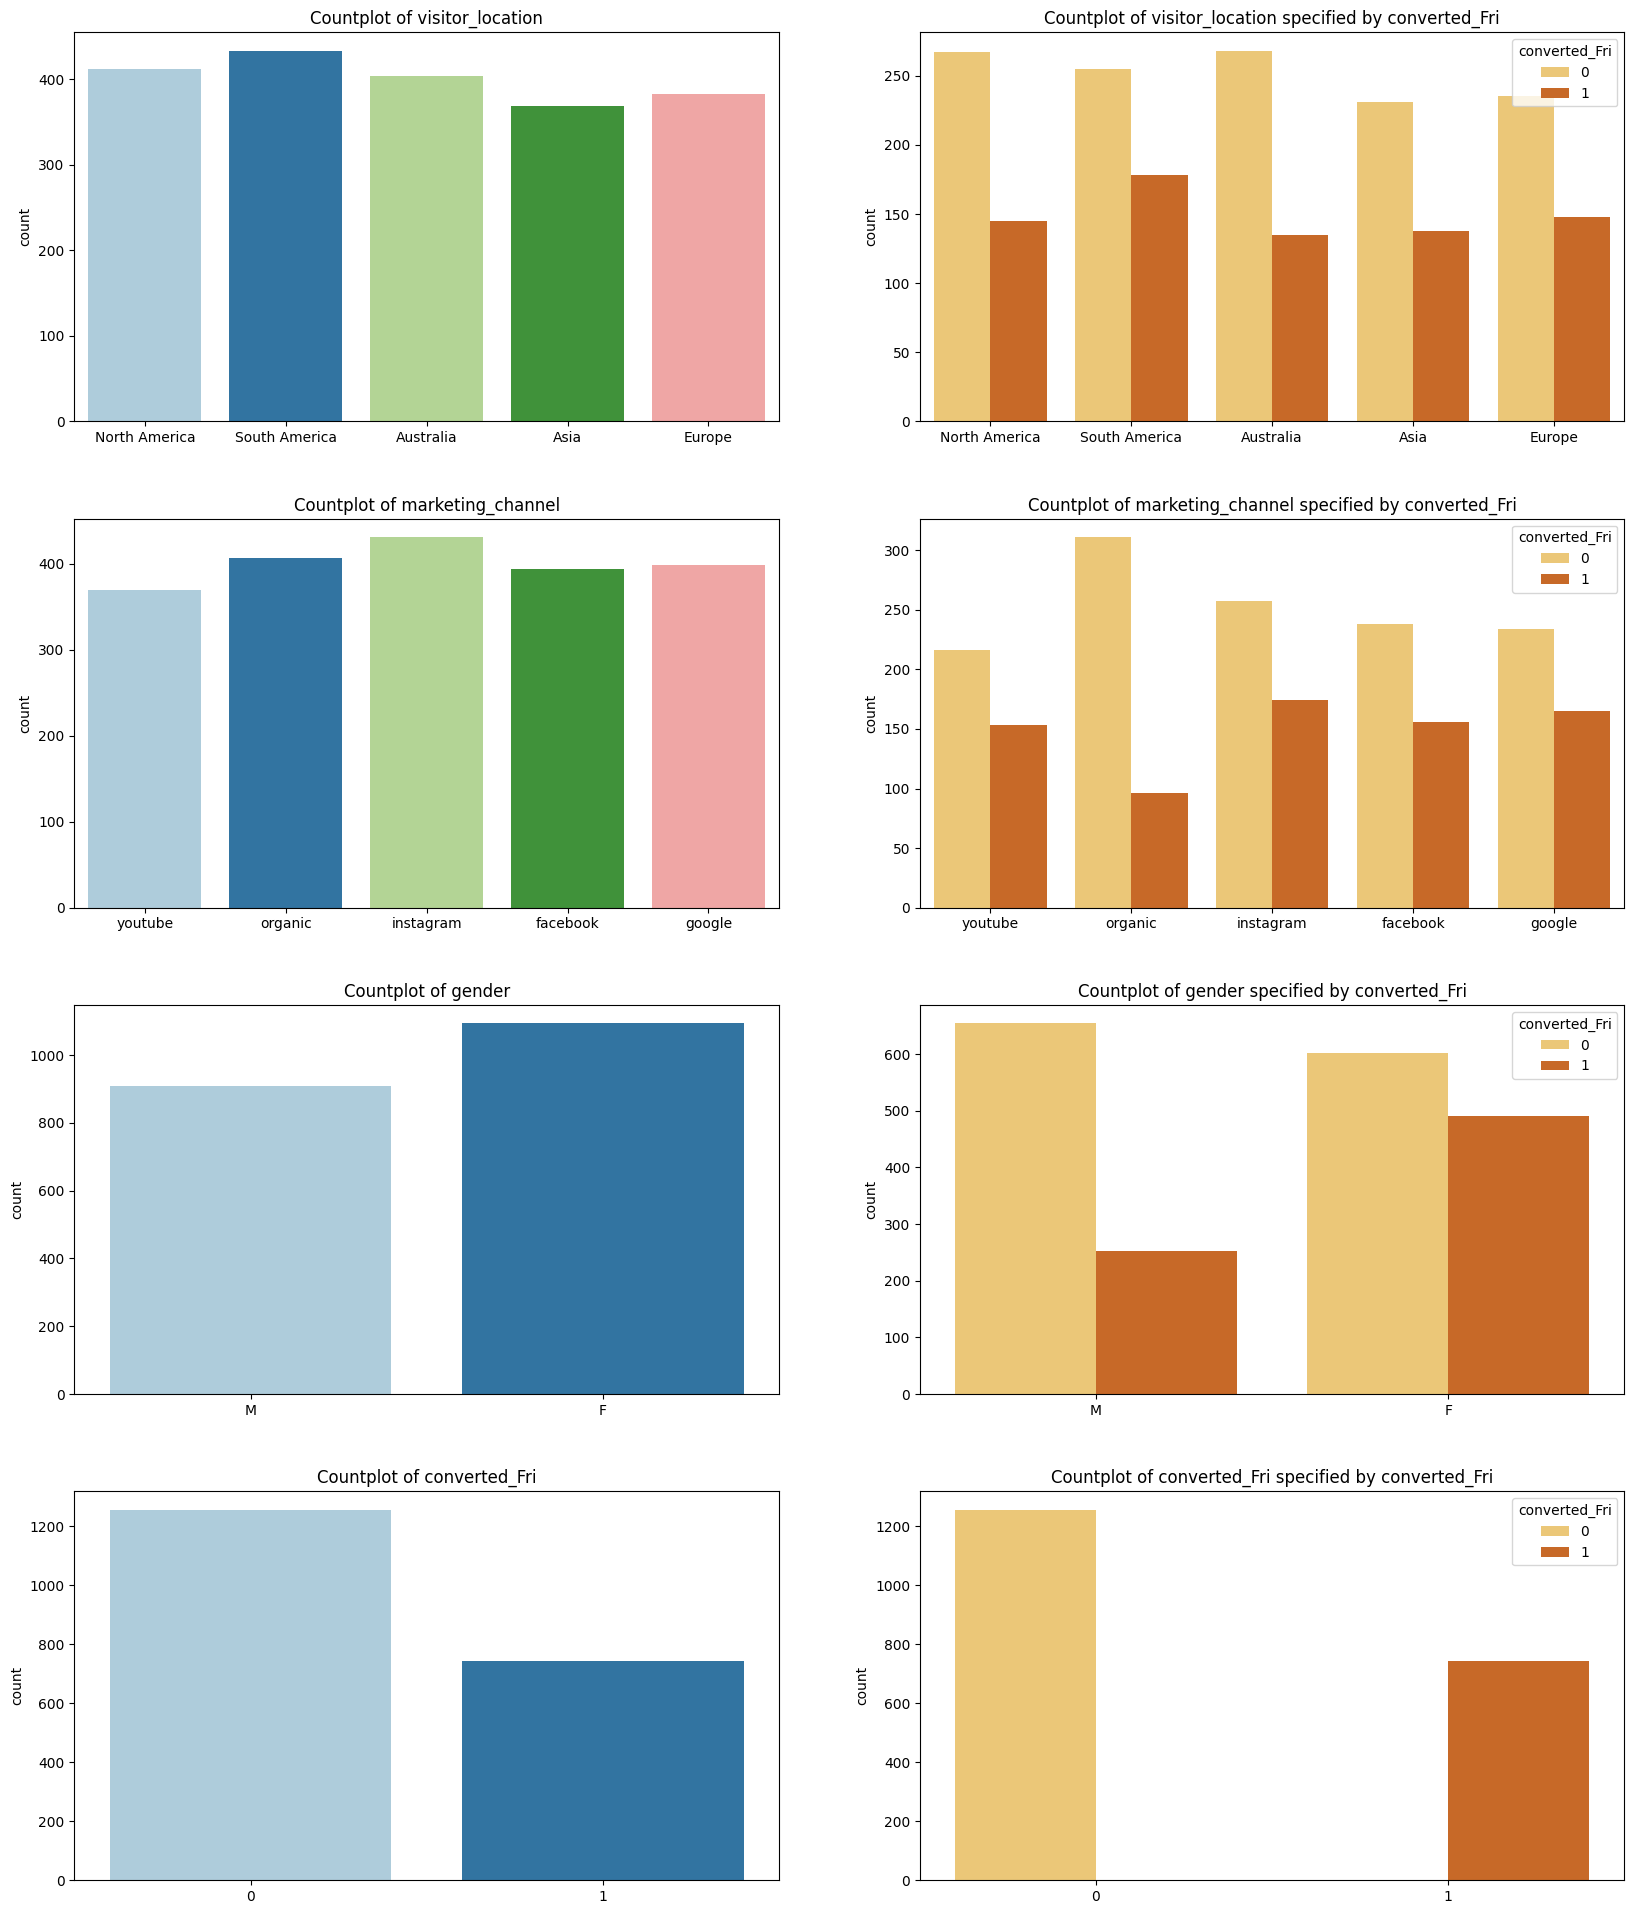

In [21]:
# Visualize categorical variable
def visualizations_cat(df: pd.DataFrame):

    fig, axes = plt.subplots(nrows=len(cat_cols), ncols=2, figsize=(20, 6 * len(cat_cols)))
    fig.subplots_adjust(hspace=0.25)
    
    for index, column in enumerate(cat_cols):

        sns.countplot(data=df, x=column, ax=axes[index, 0], palette="Paired")
        axes[index, 0].set_title(f"Countplot of {column}")
        axes[index, 0].set_xlabel("")

        sns.countplot(data=df, x=column, hue='converted_Fri', ax=axes[index, 1], palette="YlOrBr")
        axes[index, 1].set_title(f"Countplot of {column} specified by {'converted_Fri'}")
        axes[index, 1].set_xlabel("")  

    plt.show()

visualizations_cat(conversion_data)

Based on the graphs above, we can find that **gender** is an indicator of customer converted on Friday. More female customer converted on Friday than male customer.

C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` becau

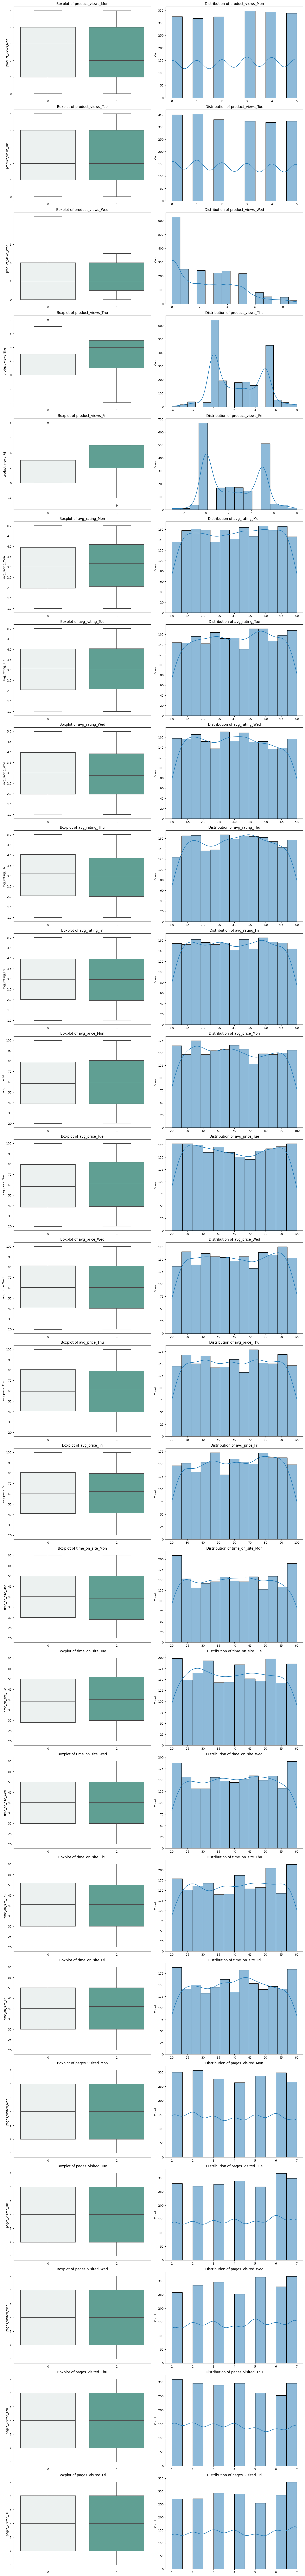

In [22]:
def visualizations_num(df: pd.DataFrame, target: str):
    
    fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(15, 5 * len(num_cols)))
    fig.tight_layout(pad=2.0)

    for index, column in enumerate(num_cols):

        sns.boxplot(data=df, x='converted_Fri', y=column, ax=axes[index, 0], palette="light:#5A9")
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")
        
    plt.show()

visualizations_num(conversion_data, target='converted_Fri')

From the graphs above, we can see that `product_views_Wed` is indicators of conversions.
* The proportion of conversion decreases as the number of product views increases on Wednesday.

From the boxplot, we can see that there are many outliers. Next, let's deal with the outliers.

## Outliers

In [60]:
def drop_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    for column in num_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Drop the rows containing outliers
        df = df[~outliers]

    return df

In [61]:
conversion_data = drop_outliers(conversion_data)
conversion_data.shape

(2000, 31)

Replace

In [62]:
# For continuous variables, we use mean to replace the outliers.
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    
    for column in num_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()

    return df

In [63]:
conversion_data = replace_outliers(conversion_data)

Check the distributions again.

C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="Blues")
C:\Users\USER\AppData\Local\Temp\ipykernel_13272\1714935664.py:12: UserWarning: Ignoring `palette` becau

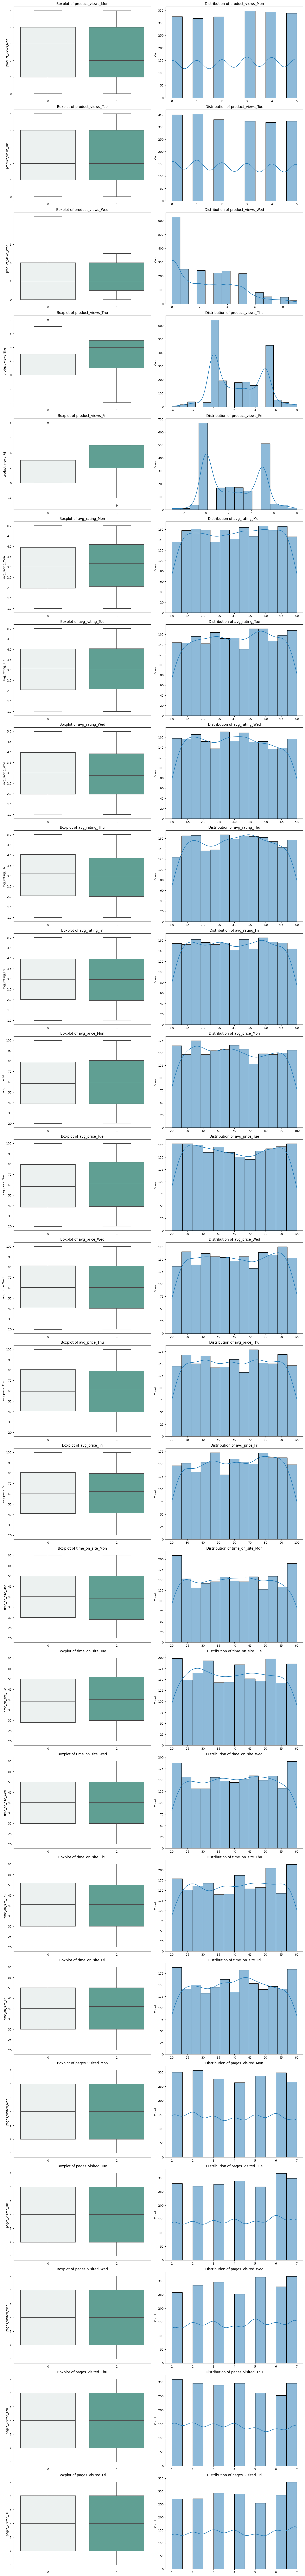

In [34]:
# Replot the boxplots
visualizations_num(conversion_data, target='converted_Fri')

In [29]:
conversion_data.shape

(2000, 29)

# Feature Engineering

2. Prepare your data for modelling (i.e., data cleaning and feature engineering).

Convert categorical values into numeric values.

In [69]:
def location(x):
    if x == 'North America':
        return 1
    elif x == 'South America':
        return 2
    elif x == 'Australia':
        return 3
    elif x == 'Asia':
        return 4
    elif x == 'Europe':
        return 5

In [70]:
conversion_data['visitor_location'] = conversion_data['visitor_location'].apply(location)
conversion_data['visitor_location'].value_counts()

visitor_location
2    433
1    412
3    403
5    383
4    369
Name: count, dtype: int64

In [74]:
def channel(x):
    if x == 'North youtube':
        return 1
    elif x == 'organic':
        return 2
    elif x == 'instagram':
        return 3
    elif x == 'facebook':
        return 4
    elif x == 'google':
        return 5

In [75]:
conversion_data['marketing_channel'] = conversion_data['marketing_channel'].apply(channel)
conversion_data['marketing_channel'].value_counts()

marketing_channel
3.0    431
2.0    407
5.0    399
4.0    394
Name: count, dtype: int64

In [78]:
def Gender(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 0

In [79]:
conversion_data['gender'] = conversion_data['gender'].apply(Gender)
conversion_data['gender'].value_counts()

gender
0    1093
1     907
Name: count, dtype: int64

In [80]:
def converted(x):
    if x != 0:
        return 1
    elif x == 0:
        return 0

In [81]:
conversion_data['converted_Fri'] = conversion_data['converted_Fri'].apply(converted)
conversion_data['converted_Fri'].value_counts()


converted_Fri
0    1256
1     744
Name: count, dtype: int64

In [85]:
cat = ['visitor_location','marketing_channel','gender']
num = ['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu','product_views_Fri','avg_rating_Mon','avg_rating_Tue','avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon','avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri','time_on_site_Mon','time_on_site_Tue', 'time_on_site_Wed','time_on_site_Thu', 'time_on_site_Fri','pages_visited_Mon','pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu','pages_visited_Fri']

First, build pipeline.

In [86]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat),
                                                 ('num', num_transformer, num)])

Split training and testing sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(conversion_data[cat+num], conversion_data['converted_Fri'], test_size=0.3, random_state=1)

In [89]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [90]:
X_train_transformed.shape

(1400, 37)

In [91]:
X_test_transformed.shape

(600, 37)

3. Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem


# Modelling Developing

## 1. Logistic Regression

In [112]:
log = LogisticRegression(max_iter=1000)

log_reg = log.fit(X_train_transformed, y_train)
y_pred_log = log.predict(X_test_transformed)

See the results:

In [113]:
cv_scores_log = cross_val_score(log, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for logistic regression: {round(cv_scores_log.mean(), 3)}.")

Cross-validation scores for logistic regression: 0.779.


In [114]:
matrix_log = confusion_matrix(y_test, y_pred_log)
matrix_log

array([[301,  70],
       [ 92, 137]], dtype=int64)

In [115]:
accuracy_log = round(accuracy_score(y_test, y_pred_log), 3)
recall_log = round(recall_score(y_test, y_pred_log), 3)
precision_log = round(precision_score(y_test, y_pred_log), 3)
f1_log = round(f1_score(y_test, y_pred_log), 3)

print(f"The accuracy of logistic regression is {accuracy_log}.")
print(f"The recall of logistic regression is {recall_log}.")
print(f"The precission of logistic regression is {precision_log}.")
print(f"The f1 of logistic regression is {f1_log}.")

The accuracy of logistic regression is 0.73.
The recall of logistic regression is 0.598.
The precission of logistic regression is 0.662.
The f1 of logistic regression is 0.628.


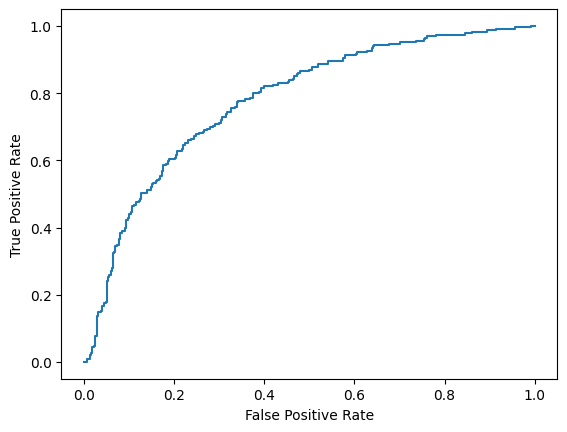

In [116]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log.predict_proba(X_test_transformed)[:,1])

plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [117]:
gmeans_log = np.sqrt(tpr_log*(1-fpr_log))
gmeans_log

array([0.        , 0.        , 0.        , 0.09307525, 0.09282198,
       0.14676444, 0.14656381, 0.16055261, 0.16033252, 0.20698839,
       0.20670387, 0.21679285, 0.21649403, 0.2769401 , 0.27617401,
       0.36243272, 0.36192899, 0.37903733, 0.37798004, 0.38349829,
       0.3829608 , 0.39903602, 0.39791355, 0.40825069, 0.40767366,
       0.41273812, 0.41215309, 0.47736215, 0.4766836 , 0.48951145,
       0.48881365, 0.49300955, 0.49230475, 0.50466579, 0.50394225,
       0.51200584, 0.51126967, 0.5497635 , 0.54897076, 0.55266757,
       0.55186834, 0.56639368, 0.56557222, 0.56914054, 0.56748365,
       0.5814977 , 0.58064693, 0.59431108, 0.59343902, 0.59680131,
       0.59416253, 0.60080142, 0.59990936, 0.61937092, 0.61844855,
       0.62162825, 0.62069976, 0.63012865, 0.6282392 , 0.63134164,
       0.6303901 , 0.64263183, 0.64166035, 0.64467995, 0.6427234 ,
       0.64870236, 0.64672158, 0.64968142, 0.64868421, 0.6516261 ,
       0.65062283, 0.66224201, 0.65711225, 0.66280164, 0.65967

In [118]:
thresholds_log[np.argmax(gmeans_log)]

0.35264015627750234

## 2. Gaussian Naive Bayes

In [120]:
nb = GaussianNB()

nb_model = nb.fit(X_train_transformed, y_train)
y_pred_nb = nb.predict(X_test_transformed)

In [121]:
# Cross-validation for NB
cv_scores_nb = cross_val_score(nb, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_nb.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.809.


In [122]:
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
recall_nb = round(recall_score(y_test, y_pred_nb), 3)
precision_nb = round(precision_score(y_test, y_pred_nb), 3)
f1_nb = round(f1_score(y_test, y_pred_nb), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb}.")

The accuracy of Gaussian Naive Bayes is 0.768.
The recall of Gaussian Naive Bayes is 0.694.
The precission of Gaussian Naive Bayes is 0.697.
The f1 of Gaussian Naive Bayes is 0.696.


In [123]:
# Hyperparameter tuning
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')

nb_grid = gridsearch_nb.fit(X_train_transformed, y_train)

print("Best parameters for Gaussian Naive Bayes: ", gridsearch_nb.best_params_)

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.12328467394420659}


In [125]:
nb_best = GaussianNB(**gridsearch_nb.best_params_)

# Fit the models with the best parameters
nb_best_model = nb_best.fit(X_train_transformed, y_train)
y_pred_nb_best = nb_best.predict(X_test_transformed)

Then, see the results:

In [126]:
matrix_nb = confusion_matrix(y_test, y_pred_nb_best)
matrix_nb

array([[305,  66],
       [ 73, 156]], dtype=int64)

In [127]:
# Cross-validation for NB
cv_scores_nb_best = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for Gaussian Naive Bayes: {round(cv_scores_nb_best.mean(), 3)}.")


accuracy_nb_best = round(accuracy_score(y_test, y_pred_nb_best), 3)
recall_nb_best = round(recall_score(y_test, y_pred_nb_best), 3)
precision_nb_best = round(precision_score(y_test, y_pred_nb_best), 3)
f1_nb_best = round(f1_score(y_test, y_pred_nb_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb_best}.")

Cross-validation scores for Gaussian Naive Bayes: 0.821.
The accuracy of Gaussian Naive Bayes is 0.768.
The recall of Gaussian Naive Bayes is 0.681.
The precission of Gaussian Naive Bayes is 0.703.
The f1 of Gaussian Naive Bayes is 0.692.


In [128]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_best.predict_proba(X_test_transformed)[:,1])

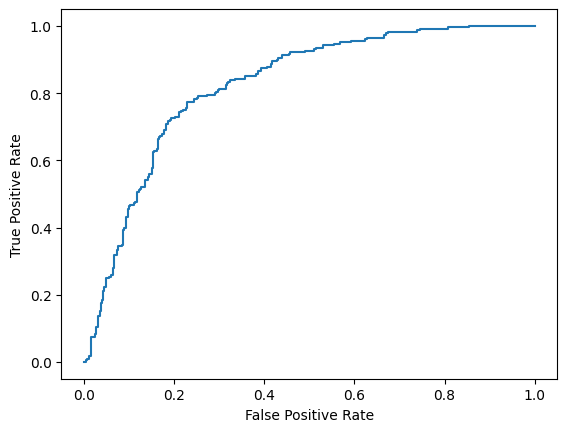

In [129]:
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [130]:
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
gmeans_nb

array([0.        , 0.        , 0.        , 0.0659035 , 0.06581414,
       0.09307525, 0.0929487 , 0.13144932, 0.13109065, 0.27025031,
       0.2691374 , 0.2845289 , 0.28413564, 0.31934089, 0.31845506,
       0.36192899, 0.36142456, 0.38403503, 0.38349829, 0.40997692,
       0.40940232, 0.41951254, 0.41892292, 0.44784744, 0.44721623,
       0.46097994, 0.46032837, 0.48665376, 0.48458142, 0.48881365,
       0.48811484, 0.49230475, 0.4908921 , 0.51126967, 0.51053244,
       0.54524888, 0.54367073, 0.55472958, 0.5539227 , 0.56474957,
       0.5622744 , 0.5658219 , 0.5649892 , 0.59926154, 0.59837702,
       0.60169216, 0.59990936, 0.62572361, 0.62479178, 0.64037501,
       0.63941851, 0.64553749, 0.64457039, 0.64760368, 0.64467995,
       0.64768547, 0.64670338, 0.64969048, 0.64771273, 0.66818724,
       0.66716476, 0.6700343 , 0.66900585, 0.67185877, 0.67082434,
       0.67366082, 0.67053477, 0.68447669, 0.68127069, 0.68674283,
       0.6856622 , 0.69108254, 0.68889902, 0.69958026, 0.69846

In [131]:
thresholds_nb[np.argmax(gmeans_nb)]

0.4331273773827908

## 3. KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

In [133]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_knn.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.746.


In [134]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 3)
recall_knn = round(recall_score(y_test, y_pred_knn), 3)
precision_knn = round(precision_score(y_test, y_pred_knn), 3)
f1_knn = round(f1_score(y_test, y_pred_knn), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_knn}.")
print(f"The recall of KNeighborsClassifier is {recall_knn}.")
print(f"The precission of KNeighborsClassifier is {precision_knn}.")
print(f"The f1 of KNeighborsClassifier is {f1_knn}.")

The accuracy of KNeighborsClassifier is 0.66.
The recall of KNeighborsClassifier is 0.533.
The precission of KNeighborsClassifier is 0.557.
The f1 of KNeighborsClassifier is 0.545.


In [135]:
# Hyperparameter tuning
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

rs_knn = randomsearch_knn.fit(X_train_transformed, y_train)

print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 72}


In [136]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Fit the model with the best parameters
knn_best_model = knn_best.fit(X_train_transformed, y_train)
y_pred_knn_best = knn_best.predict(X_test_transformed)

See the results:

In [137]:
matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
matrix_knn

array([[324,  47],
       [128, 101]], dtype=int64)

In [138]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn_best = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_knn_best.mean(), 3)}.")


accuracy_knn_best = round(accuracy_score(y_test, y_pred_knn_best), 3)
recall_knn_best = round(recall_score(y_test, y_pred_knn_best), 3)
precision_knn_best = round(precision_score(y_test, y_pred_knn_best), 3)
f1_knn_best = round(f1_score(y_test, y_pred_knn_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_knn_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_knn_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_knn_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_knn_best}.")

Cross-validation scores for KNeighborsClassifier: 0.789.
The accuracy of Gaussian Naive Bayes is 0.708.
The recall of Gaussian Naive Bayes is 0.441.
The precission of Gaussian Naive Bayes is 0.682.
The f1 of Gaussian Naive Bayes is 0.536.


In [139]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_best.predict_proba(X_test_transformed)[:,1])

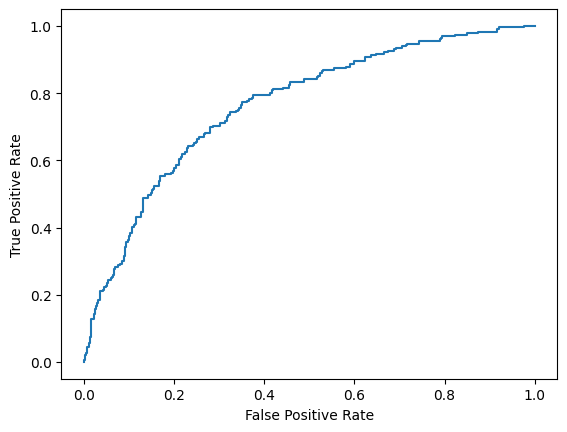

In [140]:
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [141]:
gmeans_knn = np.sqrt(tpr_knn*(1-fpr_knn))
gmeans_knn

array([0.        , 0.06608186, 0.06599274, 0.14756425, 0.14736471,
       0.16142995, 0.16121106, 0.20812259, 0.20783962, 0.23697363,
       0.23665055, 0.27062026, 0.27025031, 0.35297239, 0.35200401,
       0.37549623, 0.37497867, 0.39165244, 0.39111111, 0.40182847,
       0.40127153, 0.41169591, 0.41112371, 0.42127644, 0.4206893 ,
       0.44973578, 0.44784744, 0.45248847, 0.45185072, 0.46097994,
       0.46032837, 0.46481949, 0.46416064, 0.47300259, 0.47233023,
       0.48099756, 0.47962524, 0.48388866, 0.48319491, 0.48741504,
       0.48671422, 0.4908921 , 0.49018426, 0.5065282 , 0.50579569,
       0.51376147, 0.51227014, 0.51619564, 0.5146885 , 0.51857299,
       0.51781206, 0.52548377, 0.52393595, 0.53520468, 0.53441237,
       0.55623403, 0.55540814, 0.56947134, 0.56862328, 0.57207999,
       0.5712255 , 0.58145721, 0.58058612, 0.58729832, 0.585532  ,
       0.59869167, 0.59778662, 0.60102668, 0.60011534, 0.60333314,
       0.60241552, 0.61822964, 0.61444838, 0.62368873, 0.62176

In [142]:
thresholds_knn[np.argmax(gmeans_knn)]

0.40561701714980714

## 4. RandomForestClassifier

In [145]:
rfc = RandomForestClassifier(random_state=1)

rfc_model = rfc.fit(X_train_transformed, y_train)
y_pred_rfc = rfc.predict(X_test_transformed)

In [147]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc = cross_val_score(rfc, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for RandomForestClassifier: {round(cv_scores_rfc.mean(), 3)}.")

Cross-validation scores for RandomForestClassifier: 0.942.


In [148]:
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
recall_rfc = round(recall_score(y_test, y_pred_rfc), 3)
precision_rfc = round(precision_score(y_test, y_pred_rfc), 3)
f1_rfc = round(f1_score(y_test, y_pred_rfc), 3)

print(f"The accuracy of RandomForestClassifier is {accuracy_knn}.")
print(f"The recall of RandomForestClassifier is {recall_knn}.")
print(f"The precission of RandomForestClassifier is {precision_knn}.")
print(f"The f1 of RandomForestClassifier is {f1_knn}.")

The accuracy of RandomForestClassifier is 0.66.
The recall of RandomForestClassifier is 0.533.
The precission of RandomForestClassifier is 0.557.
The f1 of RandomForestClassifier is 0.545.


In [149]:
params_rfc = {"n_estimators": [200, 225, 275, 300], "max_depth": [None, 5, 10]}
gridsearch_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='roc_auc')

grid_rfc = gridsearch_rfc.fit(X_train_transformed, y_train)

print("Best parameters for RandomForestClassifier: ", gridsearch_rfc.best_params_)

Best parameters for RandomForestClassifier:  {'max_depth': 10, 'n_estimators': 225}


In [151]:
# Hyperparameter tuning
rfc_best = RandomForestClassifier(**gridsearch_rfc.best_params_)

# Fit the models with the best parameters
rfc_best_model = rfc_best.fit(X_train_transformed, y_train)
y_pred_rfc_best = nb_best.predict(X_test_transformed)

See the results:

In [152]:
matrix_rfc = confusion_matrix(y_test, y_pred_rfc_best)
matrix_rfc

array([[305,  66],
       [ 73, 156]], dtype=int64)

In [153]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc_best = cross_val_score(rfc_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_rfc_best.mean(), 3)}.")


accuracy_rfc_best = round(accuracy_score(y_test, y_pred_rfc_best), 3)
recall_rfc_best = round(recall_score(y_test, y_pred_rfc_best), 3)
precision_rfc_best = round(precision_score(y_test, y_pred_rfc_best), 3)
f1_rfc_best = round(f1_score(y_test, y_pred_rfc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_rfc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_rfc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_rfc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_rfc_best}.")

Cross-validation scores for KNeighborsClassifier: 0.946.
The accuracy of Gaussian Naive Bayes is 0.768.
The recall of Gaussian Naive Bayes is 0.681.
The precission of Gaussian Naive Bayes is 0.703.
The f1 of Gaussian Naive Bayes is 0.692.


In [155]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_best.predict_proba(X_test_transformed)[:,1])

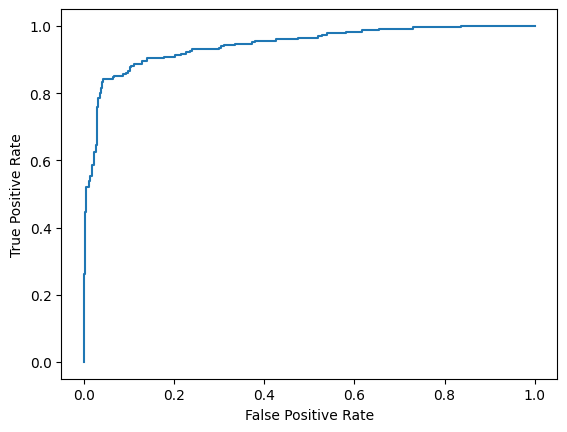

In [156]:
plt.plot(fpr_rfc,tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [157]:
gmeans_rfc = np.sqrt(tpr_rfc*(1-fpr_rfc))
gmeans_rfc

array([0.        , 0.06608186, 0.51186789, 0.51117757, 0.66649401,
       0.66559274, 0.71892232, 0.71697137, 0.72892172, 0.72792796,
       0.73966949, 0.73764577, 0.75770193, 0.75666042, 0.78165774,
       0.77950144, 0.79301201, 0.79191289, 0.85865989, 0.85746648,
       0.87212509, 0.87090958, 0.87813717, 0.87690987, 0.88644178,
       0.88519939, 0.89461667, 0.8933593 , 0.8980244 , 0.88784815,
       0.89014531, 0.88886175, 0.89114969, 0.88208911, 0.88434798,
       0.88042624, 0.88266937, 0.88135489, 0.883589  , 0.88094748,
       0.88759623, 0.8862625 , 0.8884644 , 0.88578426, 0.88797409,
       0.8785057 , 0.88282271, 0.87733928, 0.8816086 , 0.86204591,
       0.86412564, 0.85128078, 0.85332467, 0.84608684, 0.84810856,
       0.84225946, 0.84426246, 0.83983835, 0.84182613, 0.83885672,
       0.84083283, 0.80736846, 0.80926147, 0.80614292, 0.80802424,
       0.80488627, 0.80675592, 0.79244779, 0.79428004, 0.77144174,
       0.77321721, 0.76822329, 0.76998325, 0.74098116, 0.74267

In [158]:
thresholds_rfc[np.argmax(gmeans_rfc)]

0.44529482574082807

## 5. SVC

In [159]:
svc = SVC(probability=True)

svc_model = svc.fit(X_train_transformed, y_train)
y_pred_svc = svc.predict(X_test_transformed)

In [160]:
# Cross-validation for SVC
cv_scores_svc = cross_val_score(svc, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for SVC: {round(cv_scores_svc.mean(), 3)}.")

Cross-validation scores for SVC: 0.798.


In [161]:
accuracy_svc = round(accuracy_score(y_test, y_pred_svc), 3)
recall_svc = round(recall_score(y_test, y_pred_svc), 3)
precision_svc = round(precision_score(y_test, y_pred_svc), 3)
f1_svc = round(f1_score(y_test, y_pred_svc), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_svc}.")
print(f"The recall of KNeighborsClassifier is {recall_svc}.")
print(f"The precission of KNeighborsClassifier is {precision_svc}.")
print(f"The f1 of KNeighborsClassifier is {f1_svc}.")

The accuracy of KNeighborsClassifier is 0.738.
The recall of KNeighborsClassifier is 0.594.
The precission of KNeighborsClassifier is 0.68.
The f1 of KNeighborsClassifier is 0.634.


In [162]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='roc_auc')
rs_svc.fit(X_train_transformed, y_train)
rs_svc.best_estimator_

SVC(probability=True)

In [163]:
# Hyperparameter tuning
svc_best = SVC(**rs_svc.best_params_, probability=True)

# Fit the models with the best parameters
svc_best_model = svc_best.fit(X_train_transformed, y_train)
y_pred_svc_best = svc_best.predict(X_test_transformed)

In [164]:
matrix_svc = confusion_matrix(y_test, y_pred_svc_best)
matrix_svc

array([[307,  64],
       [ 93, 136]], dtype=int64)

In [165]:
# Cross-validation for RandomForestClassifier
cv_scores_svc_best = cross_val_score(svc_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for SVC: {round(cv_scores_svc_best.mean(), 3)}.")


accuracy_svc_best = round(accuracy_score(y_test, y_pred_svc_best), 3)
recall_svc_best = round(recall_score(y_test, y_pred_svc_best), 3)
precision_svc_best = round(precision_score(y_test, y_pred_svc_best), 3)
f1_svc_best = round(f1_score(y_test, y_pred_svc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_svc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_svc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_svc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_svc_best}.")

Cross-validation scores for SVC: 0.798.
The accuracy of Gaussian Naive Bayes is 0.738.
The recall of Gaussian Naive Bayes is 0.594.
The precission of Gaussian Naive Bayes is 0.68.
The f1 of Gaussian Naive Bayes is 0.634.


In [166]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_best.predict_proba(X_test_transformed)[:,1])

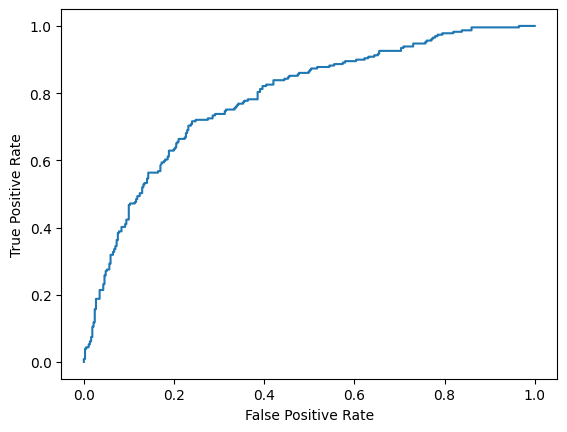

In [167]:
plt.plot(fpr_svc,tpr_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [168]:
gmeans_svc = np.sqrt(tpr_svc*(1-fpr_svc))
gmeans_svc

array([0.        , 0.06608186, 0.09345386, 0.09332783, 0.19797822,
       0.1977105 , 0.20840517, 0.20783962, 0.22767689, 0.2273665 ,
       0.24558388, 0.24524816, 0.27025031, 0.26987985, 0.32066504,
       0.32022426, 0.33964912, 0.33918096, 0.39165244, 0.39111111,
       0.42744785, 0.42566804, 0.45439637, 0.45248847, 0.47059512,
       0.46993184, 0.49581874, 0.49511794, 0.50754961, 0.50683019,
       0.51090119, 0.50944769, 0.52537176, 0.5246207 , 0.54760758,
       0.54603625, 0.55346565, 0.55266757, 0.55998799, 0.55917818,
       0.56639368, 0.56557222, 0.57971371, 0.57887049, 0.59605138,
       0.59518187, 0.59855403, 0.59680131, 0.60677639, 0.60409351,
       0.61062444, 0.60971779, 0.61937092, 0.6175248 , 0.64857533,
       0.64760368, 0.65062283, 0.64670338, 0.64969048, 0.64870236,
       0.6546267 , 0.65362803, 0.65949028, 0.6574704 , 0.6632632 ,
       0.66121925, 0.67262042, 0.6715784 , 0.6771984 , 0.67614603,
       0.67893428, 0.67681591, 0.68508688, 0.68401224, 0.69487

In [169]:
thresholds_svc[np.argmax(gmeans_svc)]

0.3927649901237897

# Model Evaluation

4. Evaluate each model using the evaluation techniques you have learned in class.


## Accuracy

Generate a dataframe including all the results.

In [170]:
data = {'Model': ['LogisticRegression', 'Gaussian Naive Bayes', 'KNeighborsClassifier', 'RandomForestClassifier','SVC'],
        'Accuracy': [accuracy_log, accuracy_nb_best, accuracy_knn_best, accuracy_rfc_best, accuracy_svc_best],
        'Recall': [recall_log, recall_nb_best, recall_knn_best, recall_rfc_best, recall_svc_best],
        'Precision': [precision_log, precision_nb_best, precision_knn_best, precision_rfc_best, precision_svc_best],
        'F1': [f1_log, f1_nb_best, f1_knn_best, f1_rfc_best, f1_svc_best]}

results = pd.DataFrame(data)
results

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression,0.730,0.598,0.662,0.628
1,Gaussian Naive Bayes,0.768,0.681,0.703,0.692
2,KNeighborsClassifier,0.708,0.441,0.682,0.536
3,RandomForestClassifier,0.768,0.681,0.703,0.692
4,SVC,0.738,0.594,0.680,0.634


## ROC curve

Plot the four roc curve figures into a 2x3 grid.

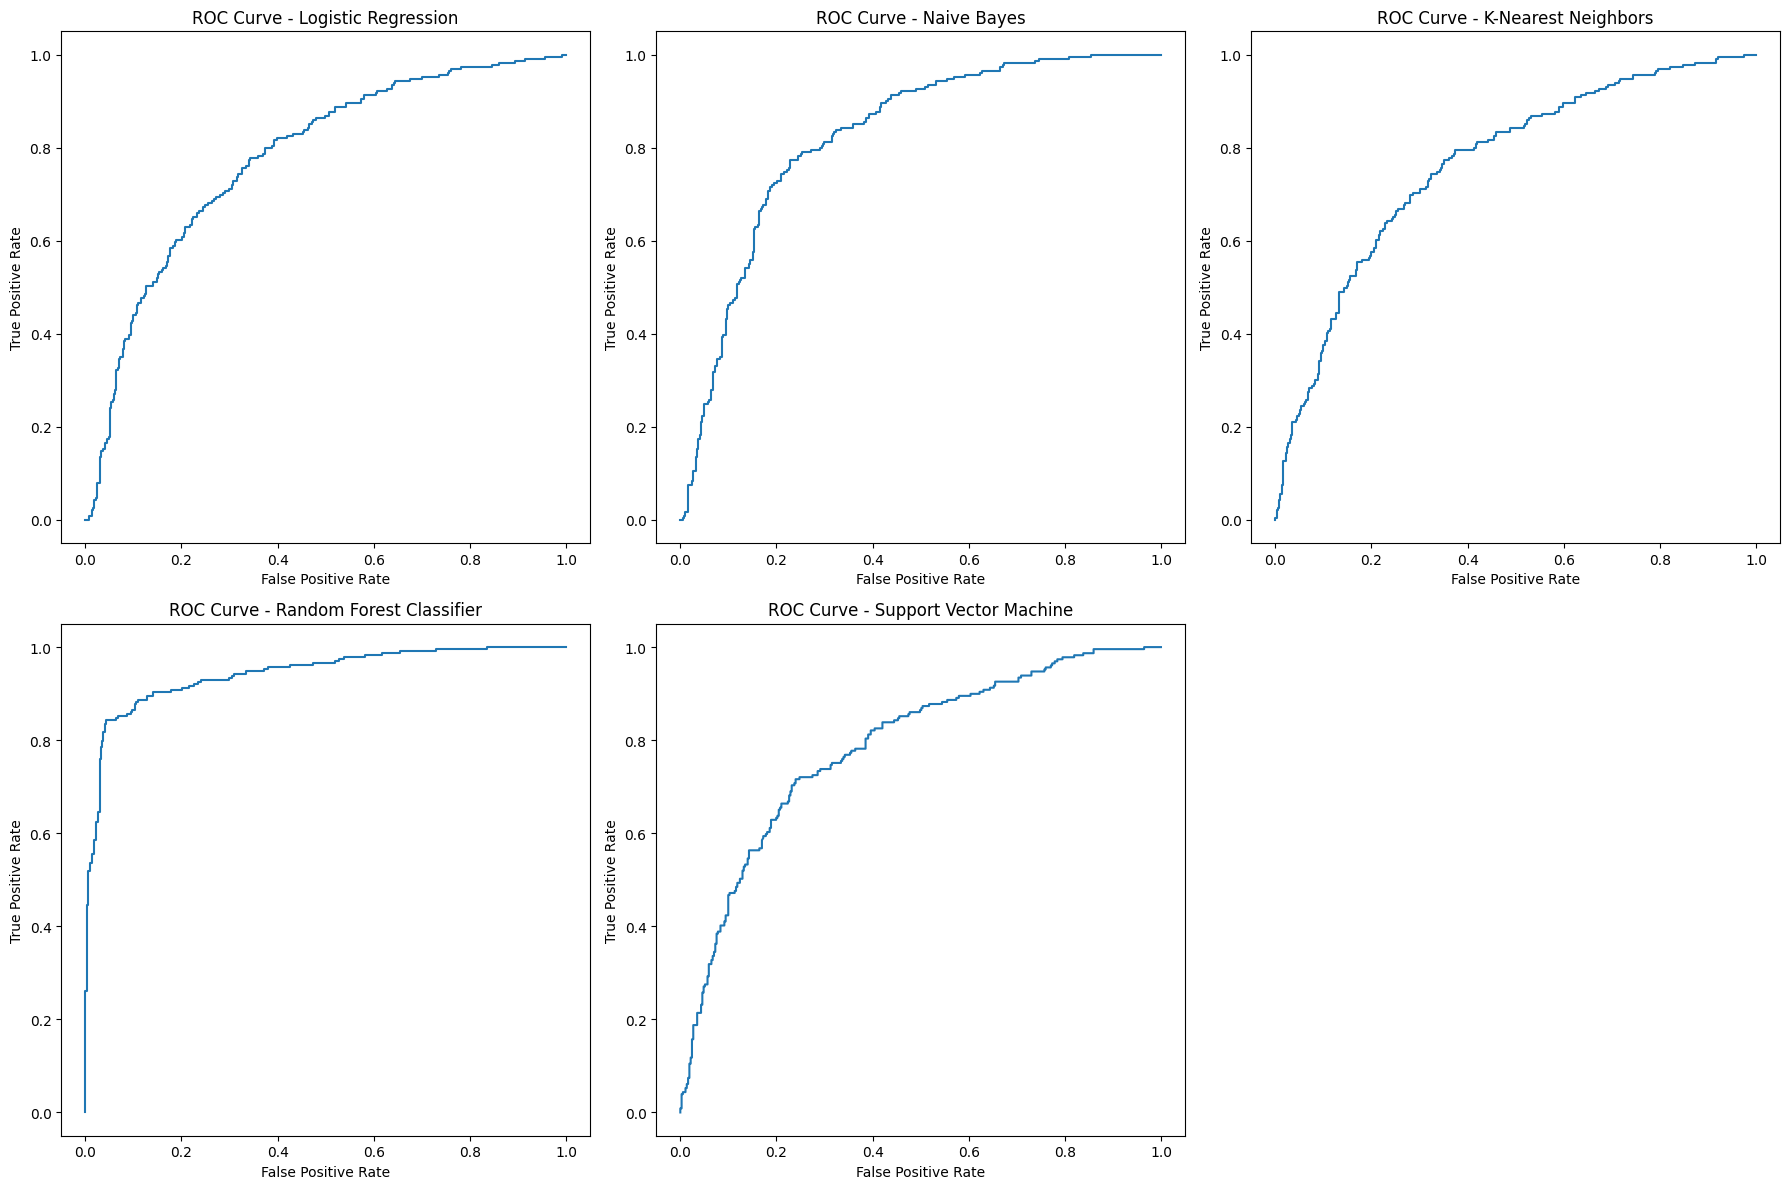

In [171]:
plt.figure(figsize=(18, 12))

# Plot ROC curve for Logistic Regression
plt.subplot(2, 3, 1)
plt.plot(fpr_log, tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')

# Plot ROC curve for Naive Bayes
plt.subplot(2, 3, 2)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')

# Plot ROC curve for K-Nearest Neighbors
plt.subplot(2, 3, 3)
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')

# Plot ROC curve for Random Forest Classifier
plt.subplot(2, 3, 4)
plt.plot(fpr_rfc, tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')

# Plot ROC curve for Support Vector Machine
plt.subplot(2, 3, 5)  # New subplot added
plt.plot(fpr_svc, tpr_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

5. Select and optimize your final model.


From above results, Gaussian Naive Bayes and RandomForestClassifier have the highest accuracy, recall, precision, and f1 scores; and the best roc curve. 

RandomForestClassifier is a reasonable choice due to its versatility and ability to handle various types of data.

Therefore, we choose RandomForestClassifier.

## Confusion Matirx

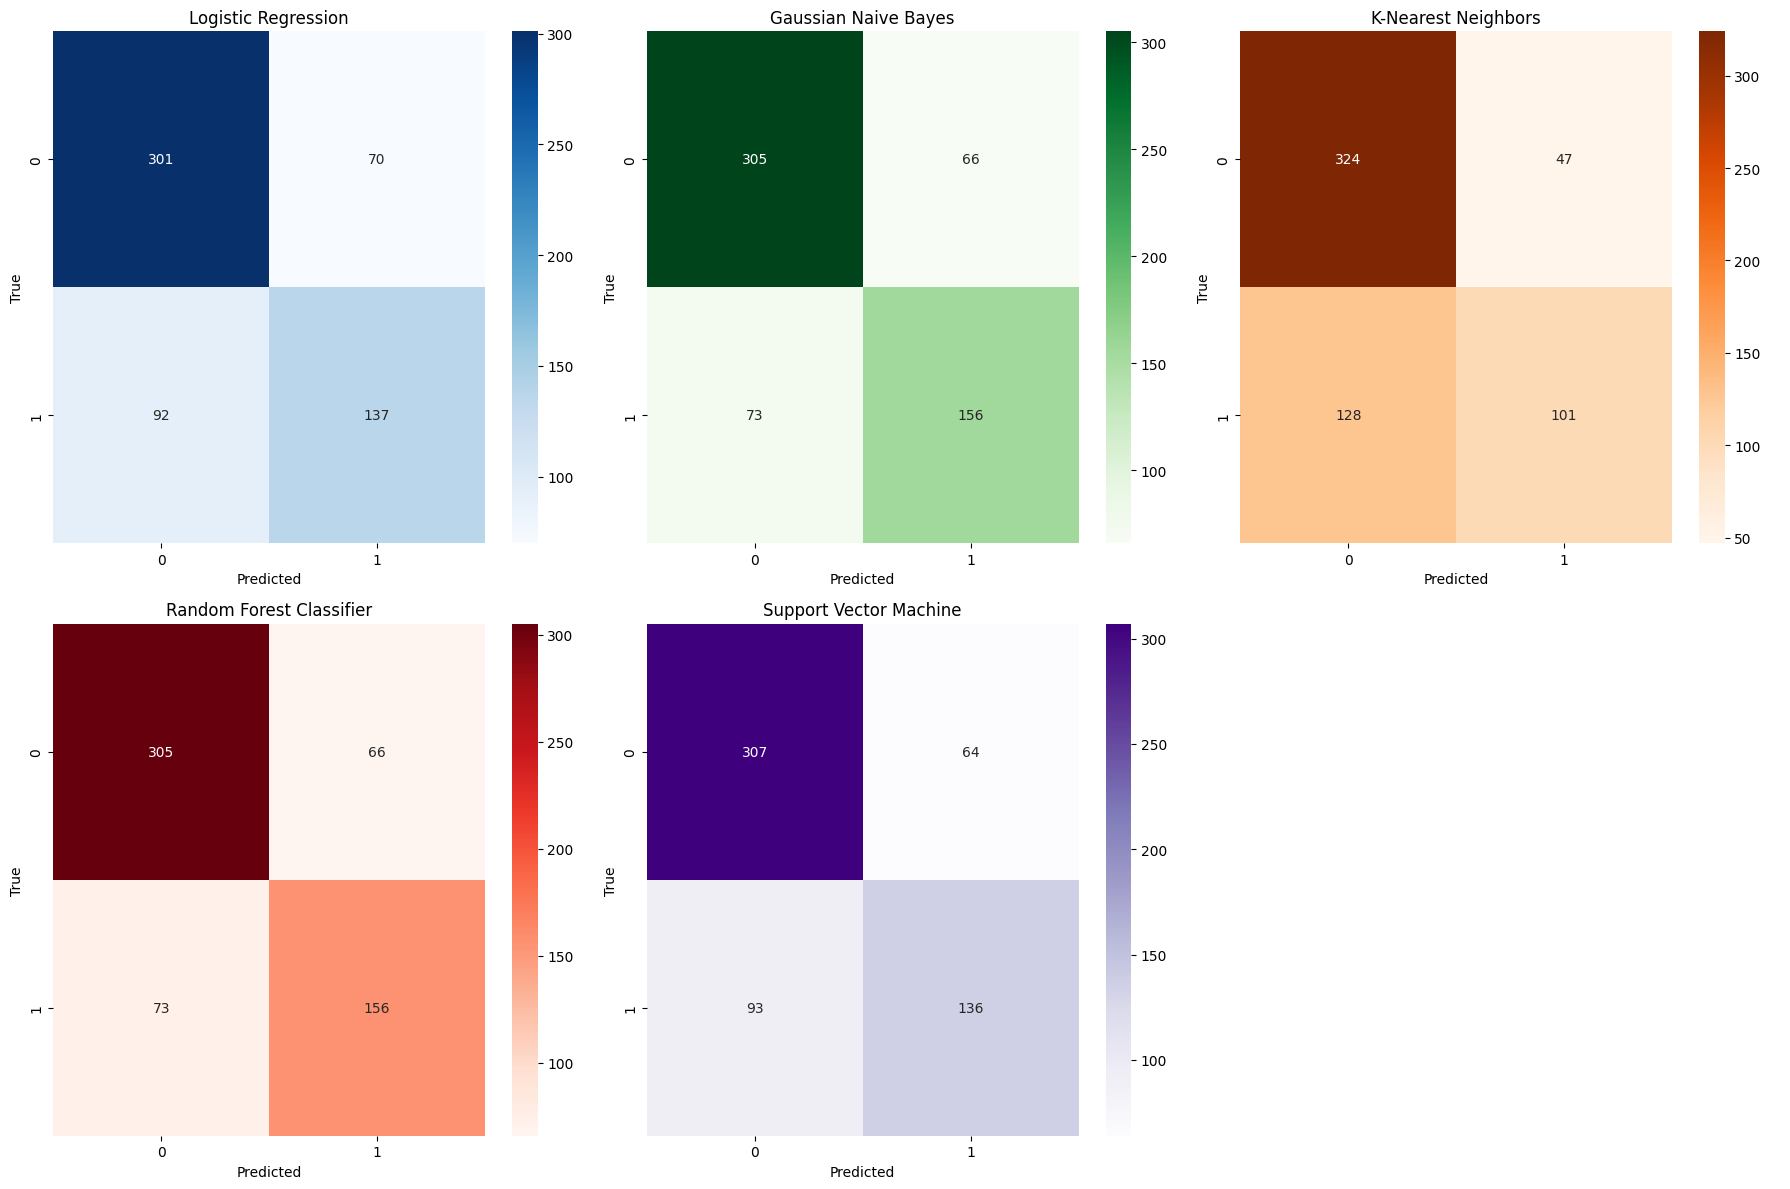

In [172]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Confusion Matrix for Logistic Regression
sns.heatmap(matrix_log, annot=True, cmap="Blues", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("True")

# Confusion Matrix for Gaussian Naive Bayes
sns.heatmap(matrix_nb, annot=True, cmap="Greens", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Gaussian Naive Bayes")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("True")

# Confusion Matrix for K-Nearest Neighbors
sns.heatmap(matrix_knn, annot=True, cmap="Oranges", fmt="d", ax=axes[0, 2])
axes[0, 2].set_title("K-Nearest Neighbors")
axes[0, 2].set_xlabel("Predicted")
axes[0, 2].set_ylabel("True")

# Confusion Matrix for Random Forest Classifier
sns.heatmap(matrix_rfc, annot=True, cmap="Reds", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Random Forest Classifier")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("True")

# Confusion Matrix for Support Vector Machine
sns.heatmap(matrix_svc, annot=True, cmap="Purples", fmt="d", ax=axes[1, 1])  # New subplot added
axes[1, 1].set_title("Support Vector Machine")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("True")


axes[1, 2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Feature Importance

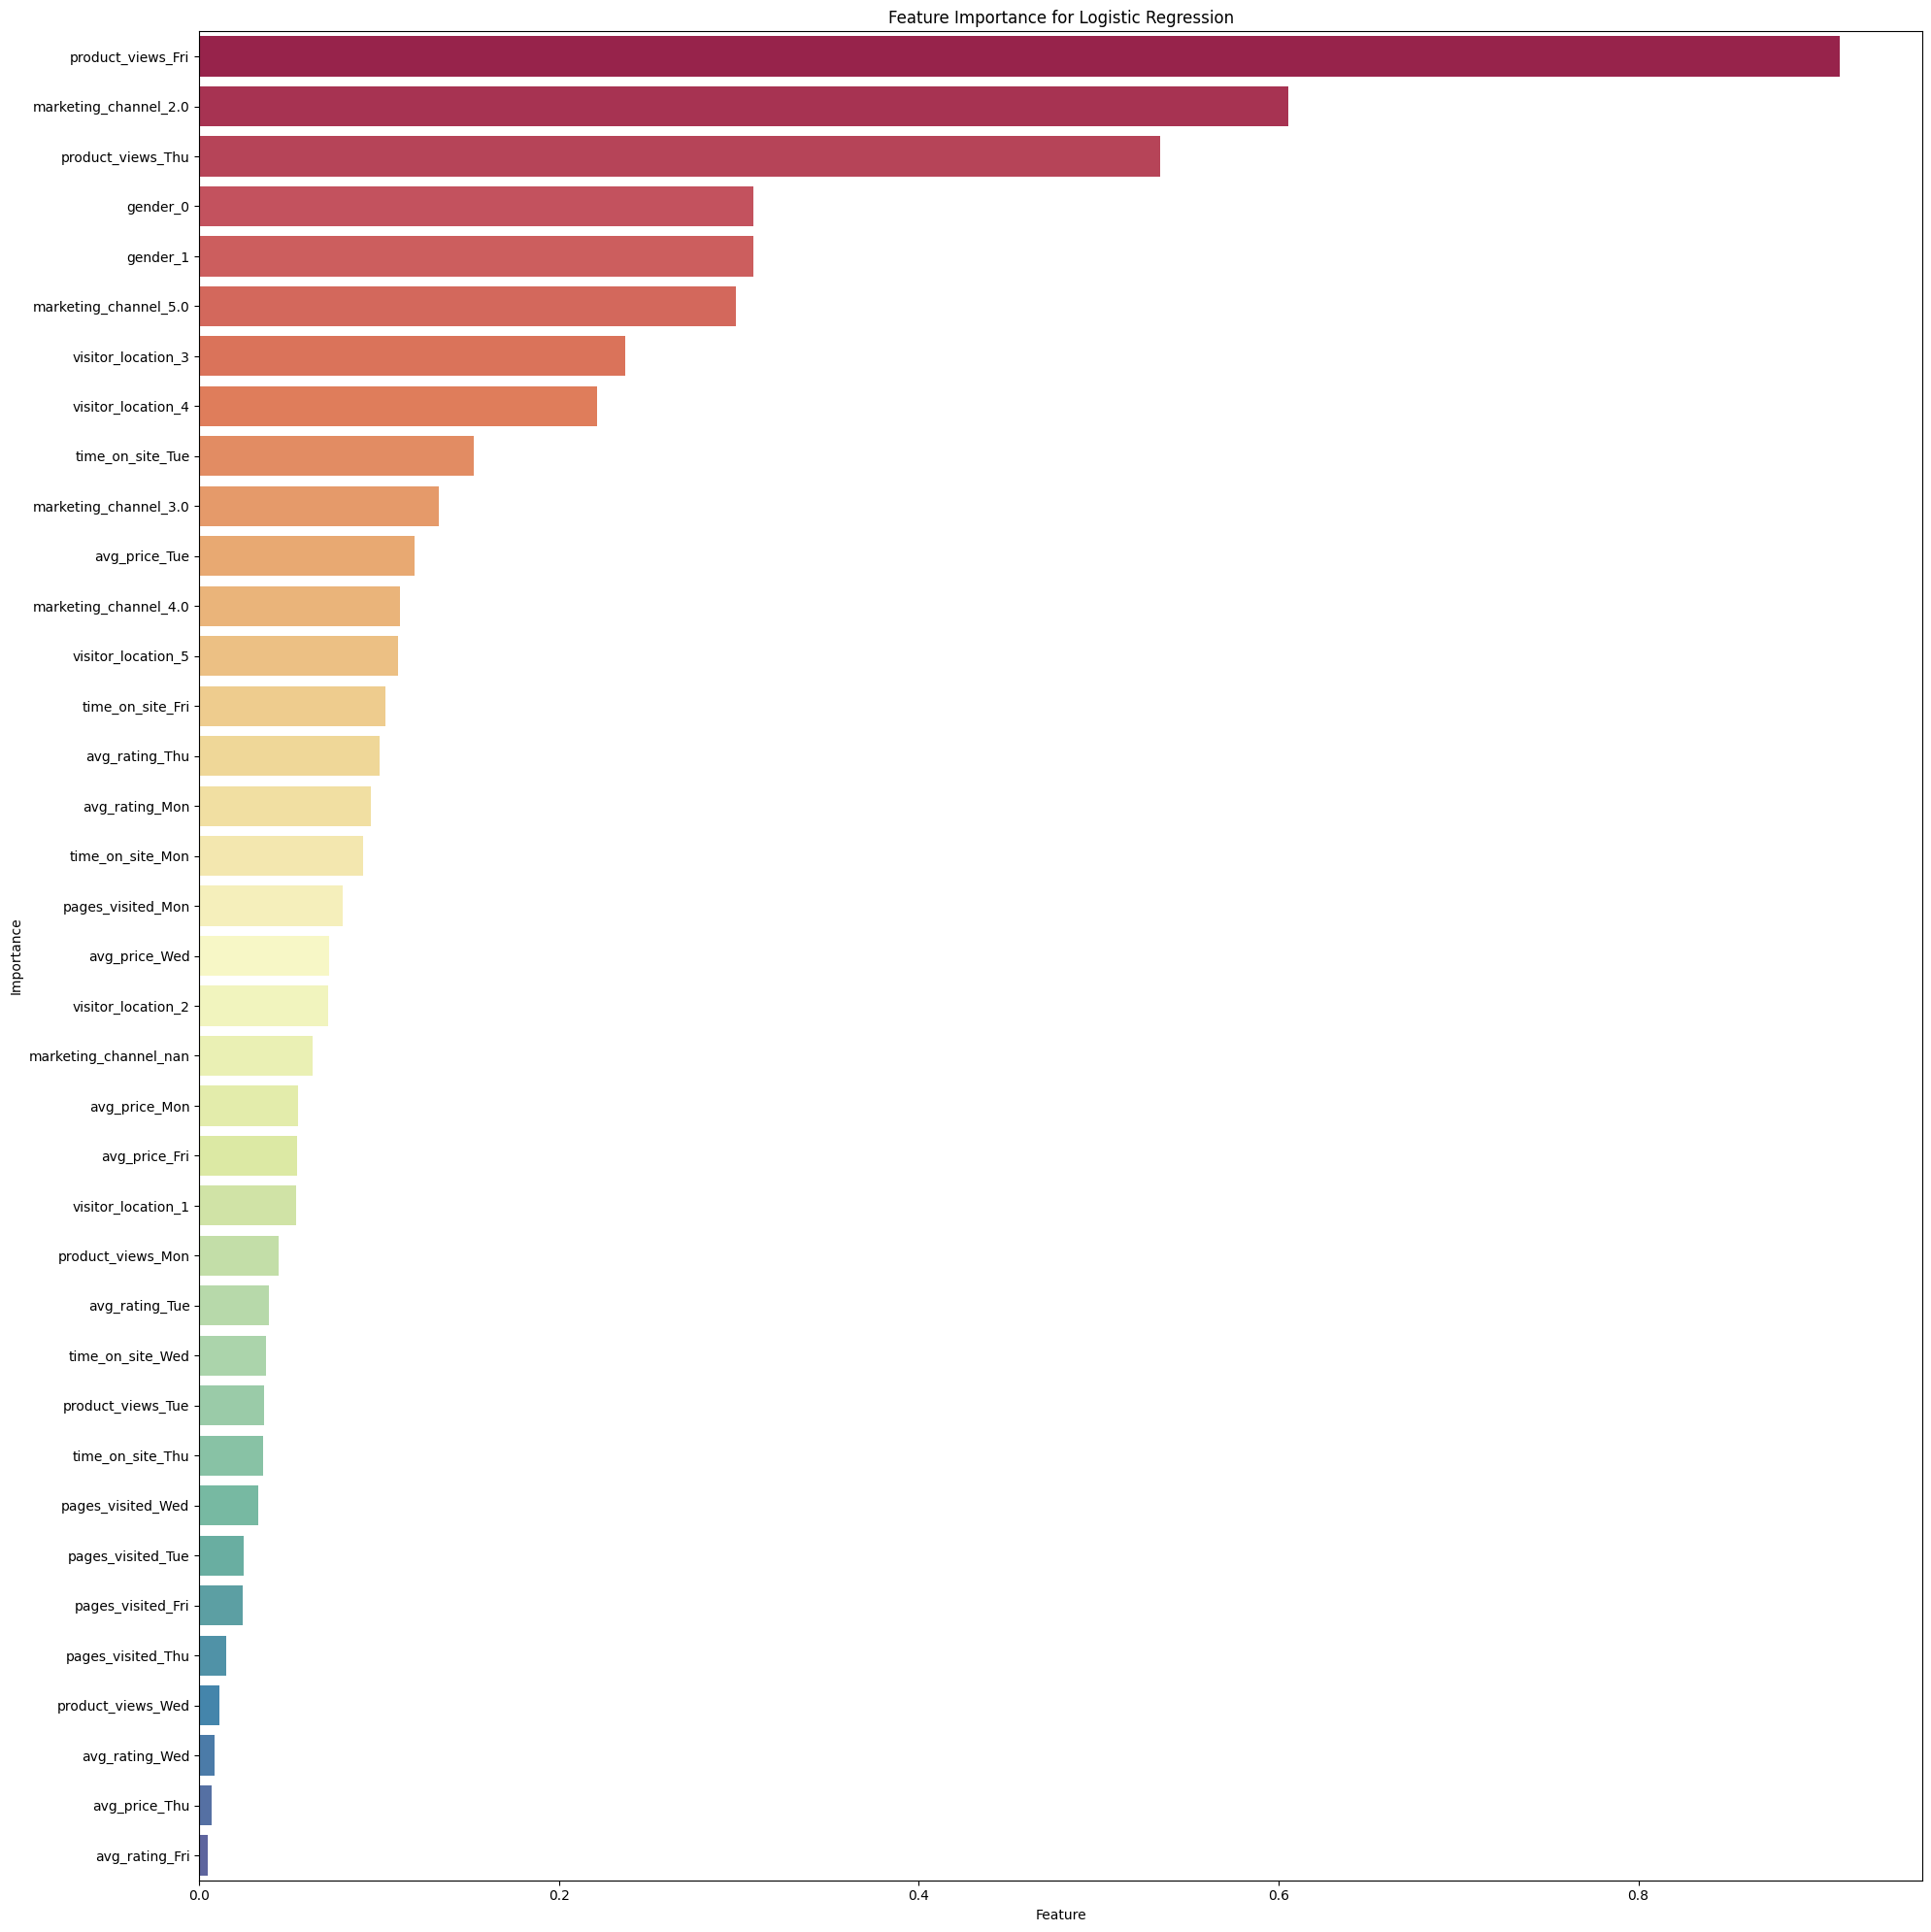

In [173]:
# LogisticRegression
coefficients = log.coef_[0]

cat_cols_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat).tolist()

# Combine the encoded categorical columns with the numerical columns
feature_names = cat_cols_encoded + num

# Create a dictionary to store the feature importance scores
feature_importance = dict(zip(feature_names, np.abs(coefficients)))

# Sort the dictionary by the absolute value of the coefficients in descending order
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True))

# Create lists to store feature names and importance scores for plotting
features_plot = []
importance_plot = []

# Iterate over the sorted feature importance dictionary and store the data in the lists
for feature, importance in sorted_feature_importance.items():
    features_plot.append(feature)
    importance_plot.append(importance)

# Plot the feature importances
plt.figure(figsize=(20, 20))
sns.barplot(x=importance_plot, y=features_plot, palette="Spectral")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Logistic Regression")
plt.tight_layout()
plt.show()

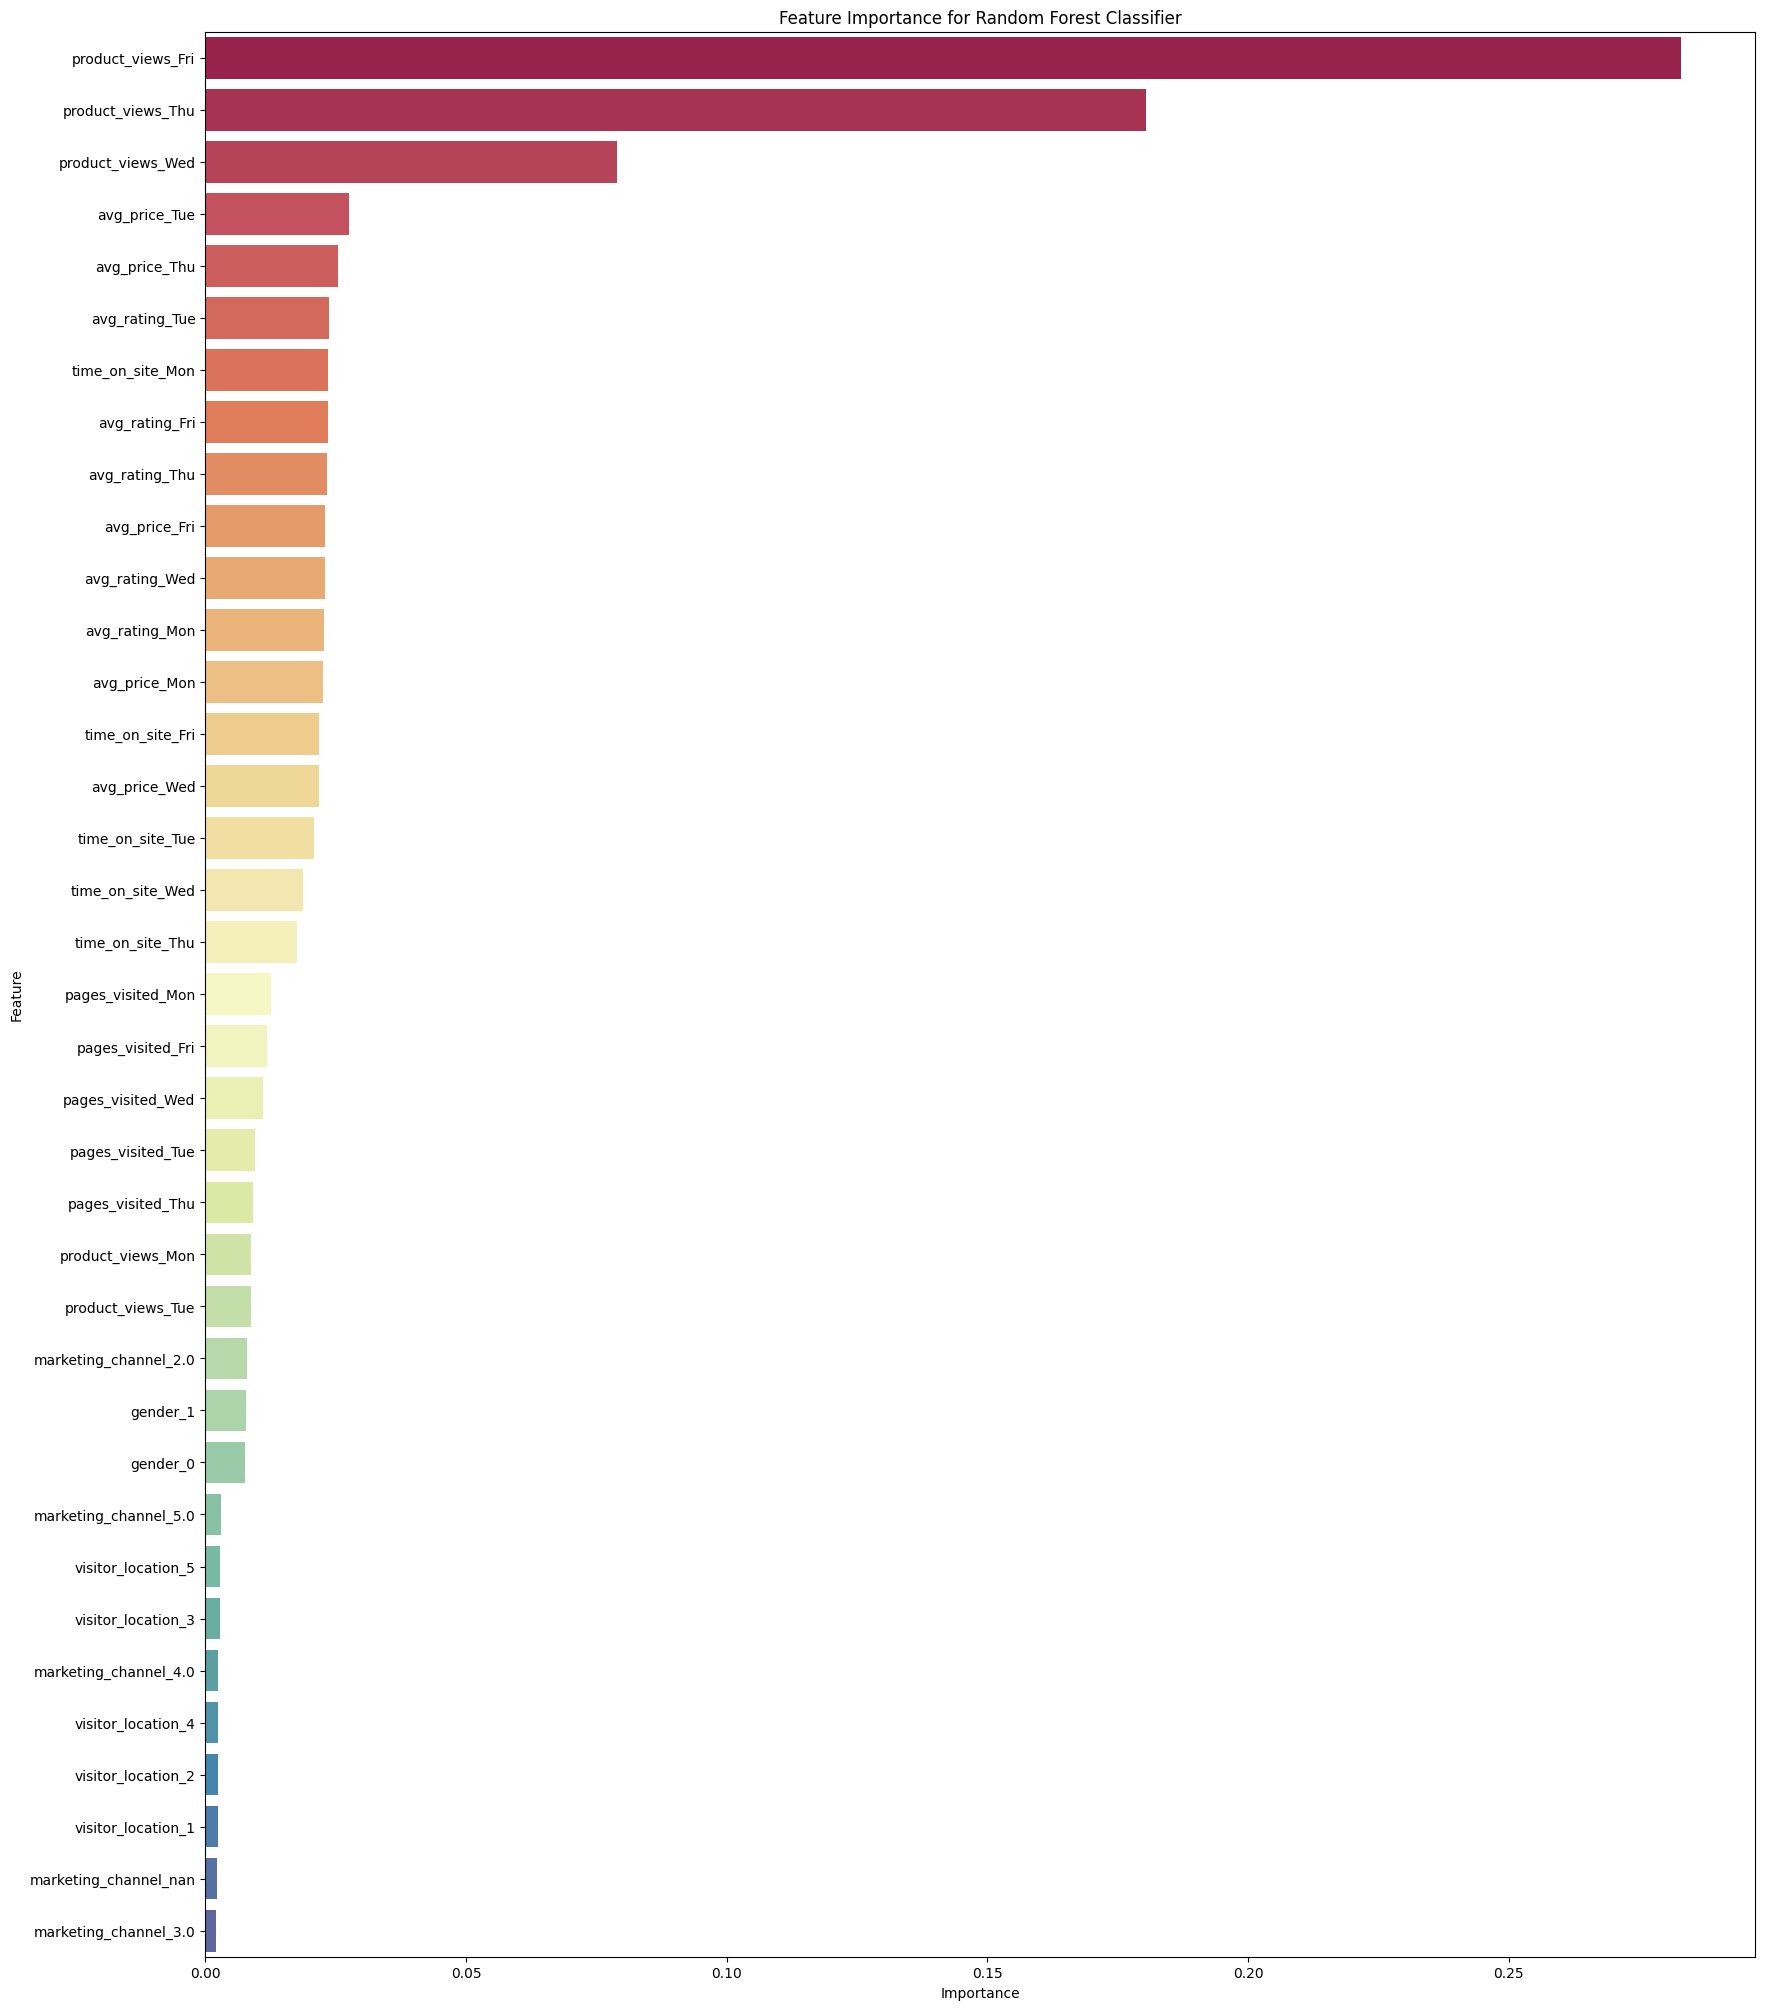

In [174]:
# rfc - feature importance
# Retrieve the feature importances
feature_importance_rfc = rfc_best.feature_importances_

# Initialize a DataFrame with feature names and the corresponding importance values
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_rfc}).sort_values(by="Importance", ascending=False)

# Set the figure size and layout
plt.figure(figsize=(20,25))
plt.tight_layout(pad=2.0)

# Plot the feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h", palette="Spectral")

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")

plt.show()


6. Explain your model to a business executive. Your explanation should include the following:
    1. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
    2. Your approach for building and evaluating the model. 
    3. The final model you selected and how you know this is the best model for the problem.
    4. How the model should be used by the business, in business process.


1. Data Exploration and Initial Hypothesis: 
When confronted with a decline in conversions, I initially hypothesized that specific customer activities and demographic attributes might be influencing the decline in conversions. After a thorough investigation, I found that this hypothesis indeed held true. Certain patterns emerged from the data that provided insights into customer behavior and its relationship with conversion rates. For example, the proportion of conversion decreases as the number of product views increases on Wednesday. Also, female customer are more likely to convert than male customer in general.

2. Approach for Building and Evaluating the Model:
To build a predictive model, I started by preparing and cleaning the data. I ensured that missing values were handled appropriately and that the data was properly encoded for the machine learning algorithms. I then split the data into training and testing sets to train and evaluate the models.
I evaluated several classification algorithms including Logistic Regression, Gaussian Naive Bayes, K-Nearest Neighbors, RandomForestClassifier, and Support Vector Classifier. For each algorithm, I measured key metrics like accuracy, recall, precision, and F1-score, which help me understand how well the model performs in identifying customers who converted.

3. Final Model Selection:
After thorough evaluation, I found that the Gaussian Naive Bayes and RandomForestClassifier performed exceptionally well. In the end, I chose the RandomForestClassifier because it demonstrated the highest accuracy, recall, precision, F1-score, and had the best ROC curve. Additionally, I employed cross-validation to ensure the model's generalizability. The chosen hyperparameters for the RandomForestClassifier are 'max_depth': 10 and 'n_estimators': 225, which further improved its performance.

4. Model Utilization in Business Process:
The RandomForestClassifier model I've developed can play a crucial role in the marketing strategies. Here's the potential business processes:
•	Segmentation and Targeting: The model can predict the likelihood of conversion for each visitor based on their activities and demographic information. By identifying visitors with a higher likelihood of converting, I can tailor your marketing efforts towards this segment, offering them special promotions, discounts, or personalized recommendations.
•	Resource Allocation: With insights from the model, I can allocate my marketing resources more efficiently. Focus more on users with high conversion probabilities like female, as this could lead to increased return on investment(ROI) compared to broad marketing campaigns. 



